## House Analysis

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import os
import sys
sys.path.append(os.getcwd() + "/../..")
from utils import unpack_hierarchical_data_frame
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Read Data

In [2]:
meta, data =pd.read_pickle("../../data/forecast_data_2020.p")

In [3]:
homes_indexes = data.columns.get_level_values(0).unique()

In [4]:
data["123"]

temperature  humidity  cloudiness     consumption
time                                                                     
2020-01-01 00:00:00  4.310000000000      72.0        99.0  4.127000000000
2020-01-01 01:00:00  4.600000000000      73.0        99.0  4.148000000000
2020-01-01 02:00:00  4.500000000000      75.0       100.0  3.828000000000
2020-01-01 03:00:00  4.640000000000      75.0        96.0  4.375000000000
2020-01-01 04:00:00  4.480000000000      75.0       100.0  4.622000000000
...                             ...       ...         ...             ...
2020-12-31 20:00:00  0.220000000000      99.0        97.0  3.915000000000
2020-12-31 21:00:00  0.420000000000     100.0        99.0  1.835000000000
2020-12-31 22:00:00  0.420000000000     100.0        99.0  3.854000000000
2020-12-31 23:00:00  0.360000000000      96.0       100.0  7.023000000000
2021-01-01 00:00:00  0.370000000000      96.0       100.0  7.692000000000

[8809 rows x 4 columns]

## Basic Features

In [5]:
data_feat_descr ={"home_num": []}
for feat in data["123"].columns:
    data_feat_descr[f"{feat}_avg"]=[]
    data_feat_descr[f"{feat}_std"]=[]
    data_feat_descr[f"{feat}_max"]=[]
    data_feat_descr[f"{feat}_min"]=[]

for home_num in homes_indexes:
    data_feat_descr["home_num"].append(home_num)
    for feat in data[home_num].columns:
        data_feat_descr[f"{feat}_avg"].append(np.mean(data[home_num][feat].astype(float)))
        data_feat_descr[f"{feat}_std"].append(np.std(data[home_num][feat].astype(float)))
        data_feat_descr[f"{feat}_max"].append(np.max(data[home_num][feat].astype(float)))
        data_feat_descr[f"{feat}_min"].append(np.min(data[home_num][feat].astype(float)))

In [6]:
data_feat_descr_df = pd.DataFrame(data_feat_descr).set_index("home_num")

In [7]:
data_feat_descr_df

temperature_avg  temperature_std  temperature_max  temperature_min  \
home_num                                                                       
854              7.868519         7.071587            29.20            -7.61   
123              9.479780         6.259427            28.53            -4.70   
852              8.811039         6.848238            30.43            -5.87   
222              9.406821         6.241654            28.94            -5.26   
484              8.313985         7.015250            30.14            -6.99   
...                   ...              ...              ...              ...   
890              8.469748         7.188199            30.53            -7.87   
412              8.363114         7.140865            30.45            -7.44   
261              8.227843         7.017293            29.40            -7.70   
957              7.825307         6.646547            28.50            -7.33   
600              8.023417         6.973583            29.34            -7.36   

          humidity_avg  humidity_std  humidity_max  humidity_min  \
home_num                                                           
854          74.743024     20.013276         100.0          12.0   
123          74.841480     17.253693         100.0          25.0   
852          74.320854     19.732563         100.0          17.0   
222          76.136031     17.791198         100.0          22.0   
484          73.703916     19.445464         100.0          15.0   
...                ...           ...           ...           ...   
890          74.883914     20.023776         100.0          15.0   
412          75.179669     20.149674         100.0          13.0   
261          74.469656     20.175544         100.0          12.0   
957          74.466330     19.740073         100.0          13.0   
600          74.888137     20.075298         100.0          12.0   

          cloudiness_avg  cloudiness_std  cloudiness_max  cloudiness_min  \
home_num                                                                   
854            64.280554       37.532766           100.0             0.0   
123            60.414406       38.517227           100.0             0.0   
852            62.404881       38.264498           100.0             0.0   
222            60.840969       39.120266           100.0             0.0   
484            62.653162       38.336388           100.0             0.0   
...                  ...             ...             ...             ...   
890            63.645476       37.856753           100.0             0.0   
412            63.715098       38.031963           100.0             0.0   
261            63.605449       37.713242           100.0             0.0   
957            63.379158       37.764556           100.0             0.0   
600            63.733488       37.793912           100.0             0.0   

          consumption_avg  consumption_std  consumption_max  consumption_min  
home_num                                                                      
854              2.893879         1.646618            9.882            0.259  
123              2.173687         1.698909            9.571            0.093  
852              3.059134         1.631799            9.103            0.421  
222              2.245492         1.351246            7.860            0.320  
484              2.617564         1.778882           12.426            0.287  
...                   ...              ...              ...              ...  
890              3.905317         1.761891           11.888            0.657  
412              2.678681         1.707821           11.593            0.162  
261              3.801180         2.554159           14.508            0.424  
957              2.169117         1.421987           10.270            0.000  
600              2.285638         1.458018            9.321            0.533  

[100 rows x 16 columns]

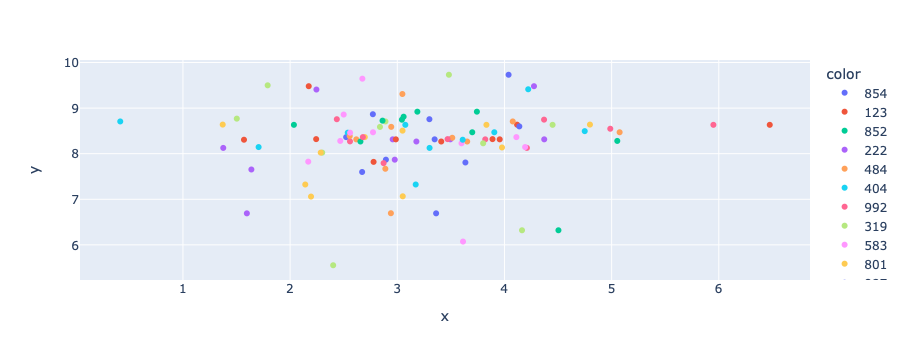

In [33]:
fig = px.scatter(x=data_feat_descr_df["consumption_avg"], y=data_feat_descr_df["temperature_avg"],
                color = data_feat_descr_df.reset_index()["home_num"])
fig.show()

## Dimensionality Reduction

In [41]:
scaled_data = StandardScaler().fit_transform(data_feat_descr_df)
pca = PCA(n_components=10)
pca.fit(scaled_data)

PCA(n_components=10)

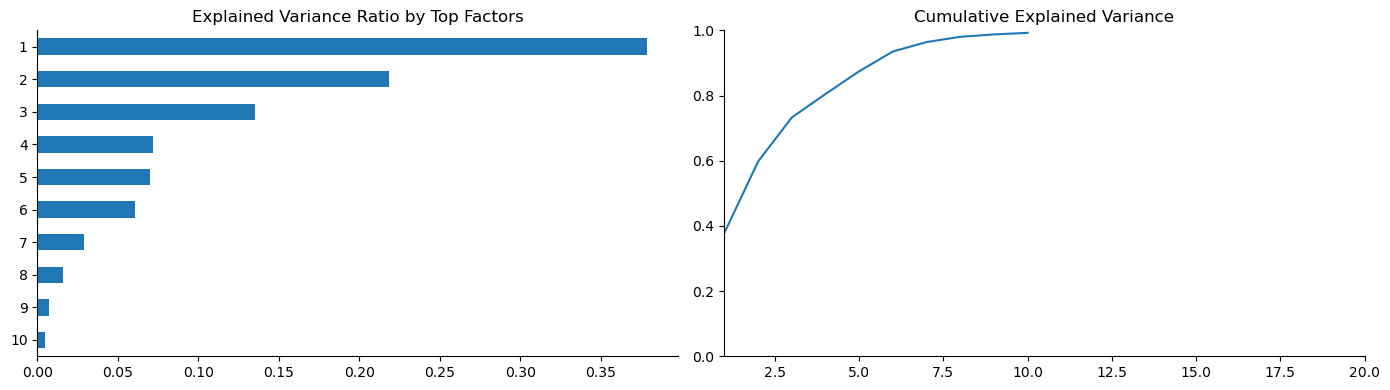

In [42]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 4))
title = 'Explained Variance Ratio by Top Factors'
var_expl = pd.Series(pca.explained_variance_ratio_)
var_expl.index += 1
var_expl.iloc[:15].sort_values().plot.barh(title=title,
                                           ax=axes[0])
var_expl.cumsum().plot(ylim=(0, 1),
                       ax=axes[1],
                       title='Cumulative Explained Variance',
                       xlim=(1, 20))
sns.despine()
fig.tight_layout()

In [44]:
pca_compoments = pd.DataFrame(pca.transform(scaled_data)[:, :3], 
                            columns=[f'Principal Component {i+1}' for i in range(3)], 
                            index=data_feat_descr_df.index)

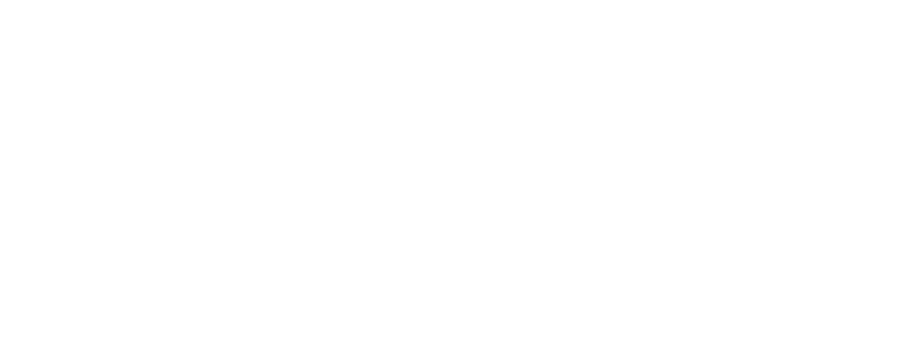

In [54]:
df = px.data.gapminder()
fig = px.scatter_3d(pca_compoments.reset_index(), x='Principal Component 1', y='Principal Component 2', z='Principal Component 3',
                    hover_data=['home_num'])
fig.update_layout(
    margin=dict(l=90, r=30, t=90, b=30),
)


## Corr Analysis

In [8]:
df_unpack = unpack_hierarchical_data_frame(data)

#### Consumption

In [17]:
cons = pd.pivot_table(df_unpack.reset_index(), values = "consumption", index = "time", columns = "home_num")

/Users/efim/opt/anaconda3/envs/EnergyForecasting/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


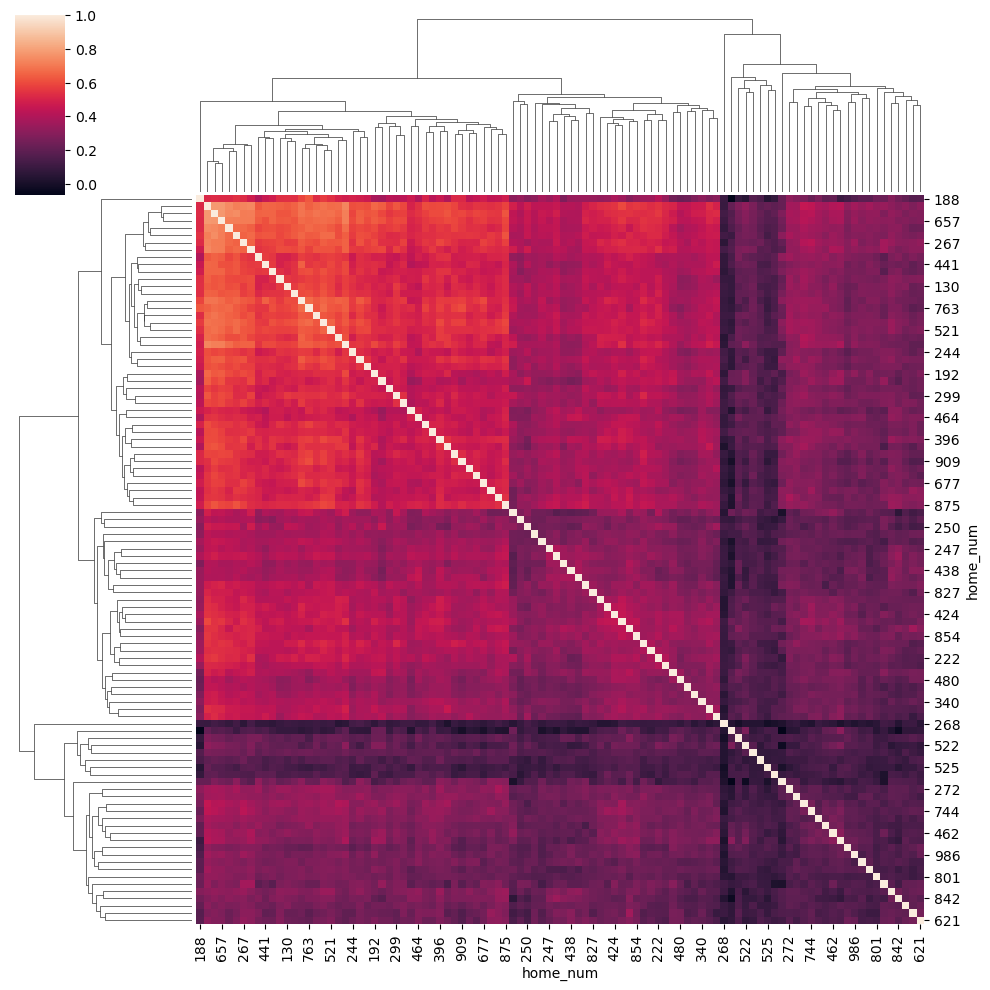

In [19]:
sns.clustermap(cons.corr())

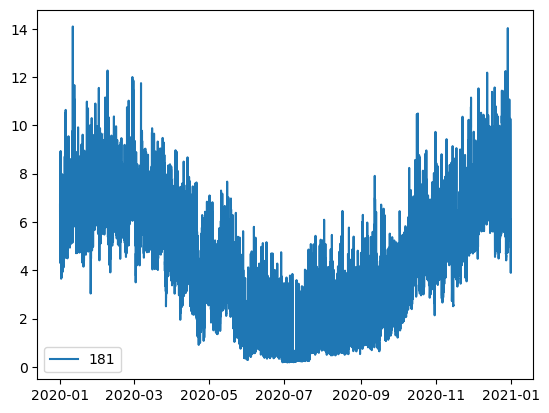

In [45]:
plt.plot(data["657"].consumption, label="181")
plt.legend()

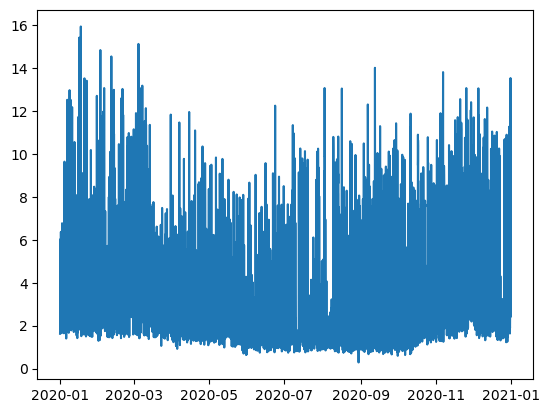

In [46]:
plt.plot(data["621"].consumption, label="621")

#### Temperature

In [21]:
temp = pd.pivot_table(df_unpack.reset_index(), values = "temperature", index = "time", columns = "home_num")

/Users/efim/opt/anaconda3/envs/EnergyForecasting/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


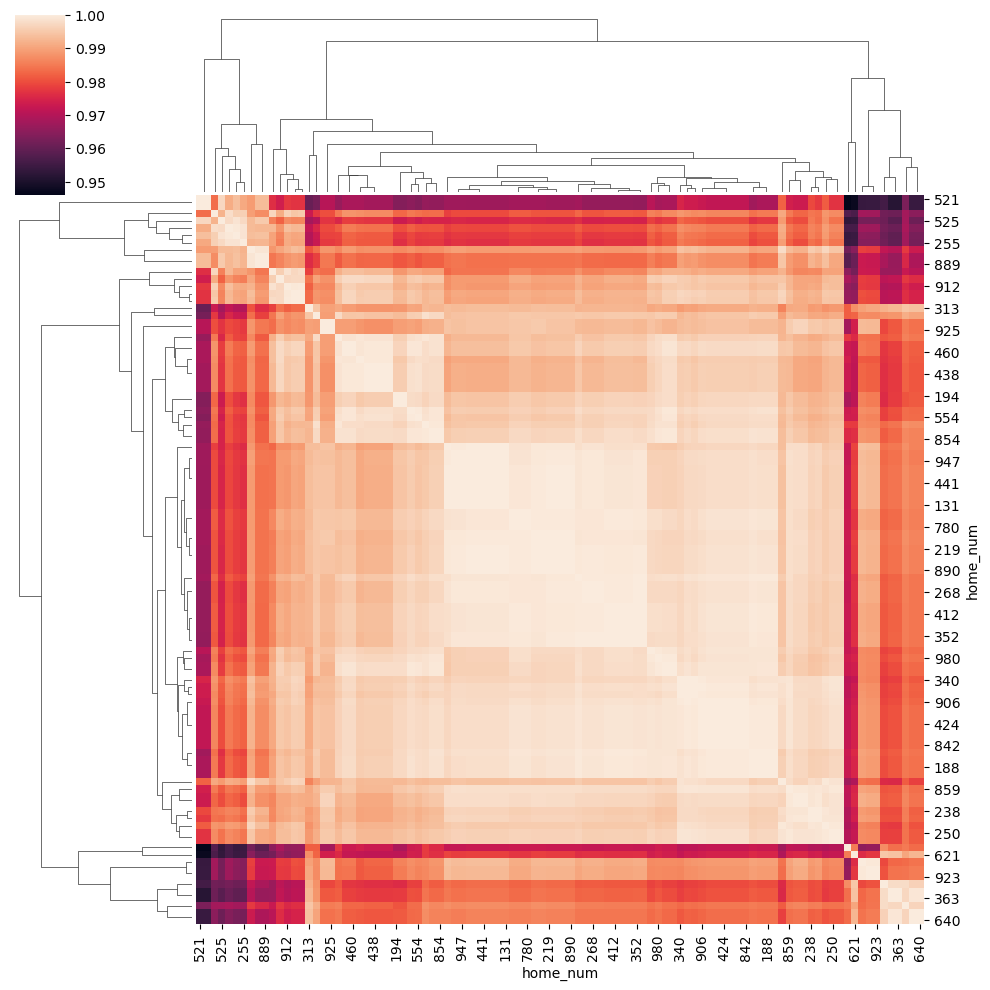

In [22]:
sns.clustermap(temp.corr())

## Clusterring Based on Corr

In [82]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

cons_corr=cons.corr()

kmeans = KMeans(n_clusters=2)
kmeans.fit(cons_corr)
clusters = kmeans.predict(cons_corr)

NameError: name 'cons' is not defined

/Users/efim/opt/anaconda3/envs/EnergyForecasting/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



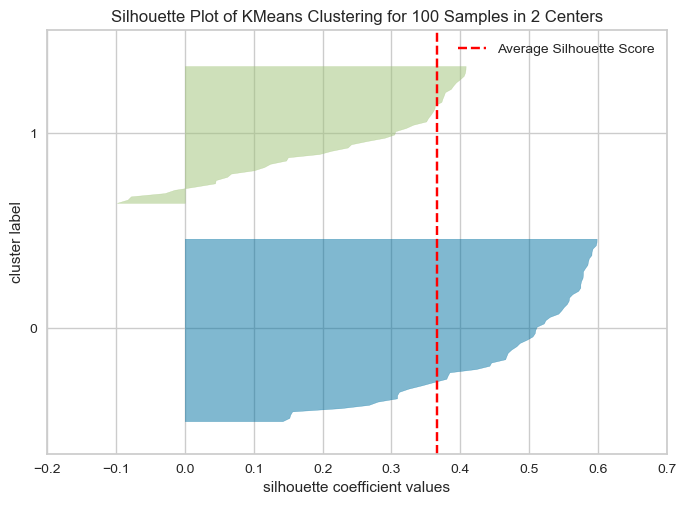

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 100 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [148]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(cons_corr)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [149]:
import scipy.cluster.hierarchy as spc



pdist = spc.distance.pdist(cons_corr)
linkage = spc.linkage(pdist, method='complete')
idx = spc.fcluster(linkage, 0.9 * pdist.max(), 'distance')

In [150]:
df_clusters = pd.DataFrame({"clusters": idx, "home_num":cons_corr.index})

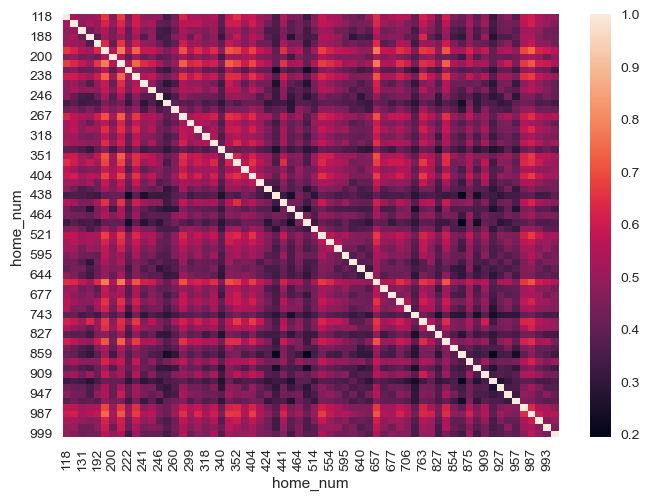

KeyboardInterrupt: 

In [142]:
for clust in [1,2]:
    home_nums = df_clusters[df_clusters.clusters ==clust].home_num
    new_data_dict = {num: data[num] for num in home_nums}
    df_unpack_ = pd.DataFrame()
    for homes in new_data_dict.keys():
        df_home = new_data_dict[homes].copy()
        df_home["home_num"] = homes
        df_unpack_ = pd.concat([df_unpack_,df_home])
    cluster_cons = pd.pivot_table(df_unpack_.reset_index(), values = "consumption", index = "time", columns = "home_num")
    sns.heatmap(cluster_cons.corr())
    plt.show()

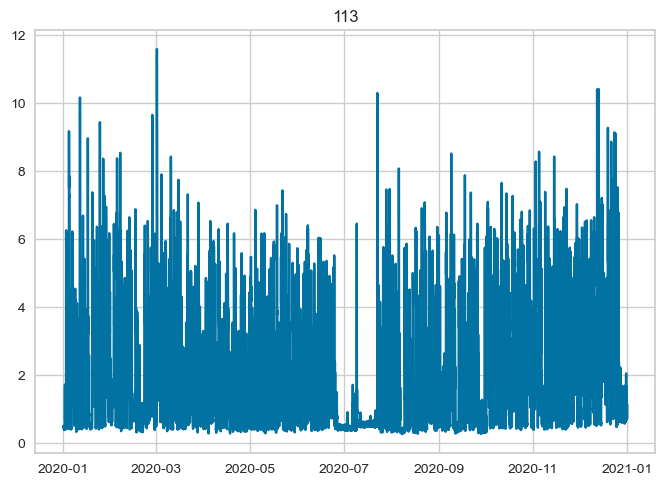

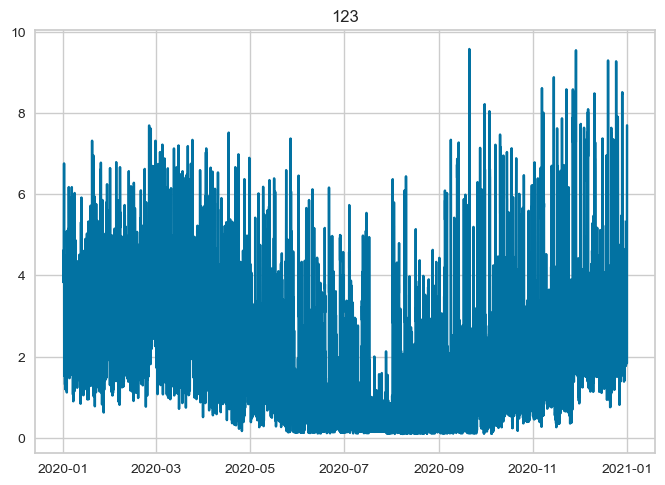

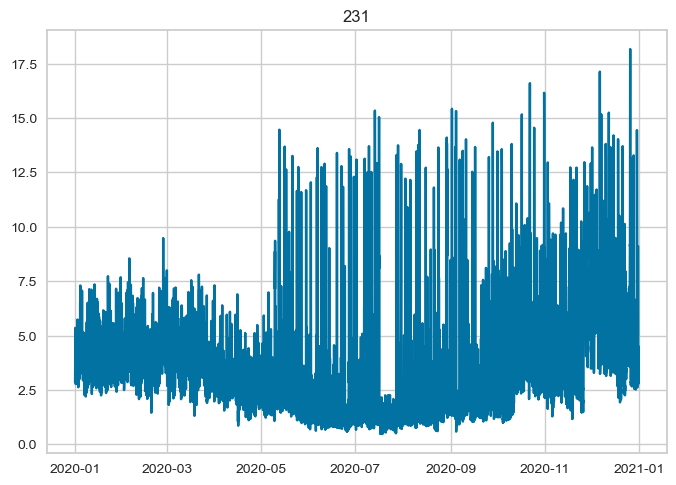

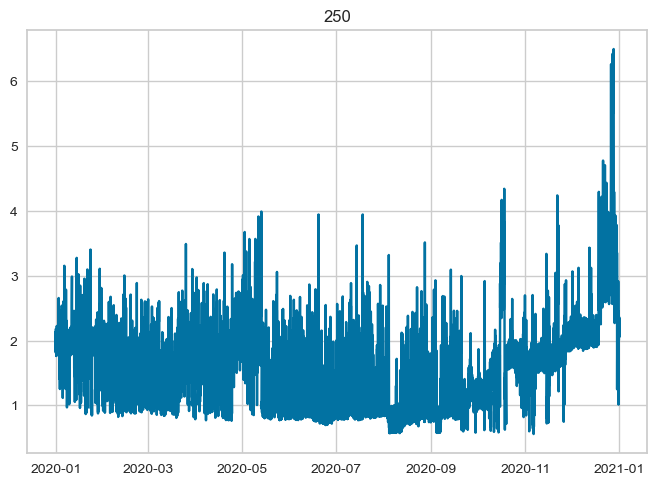

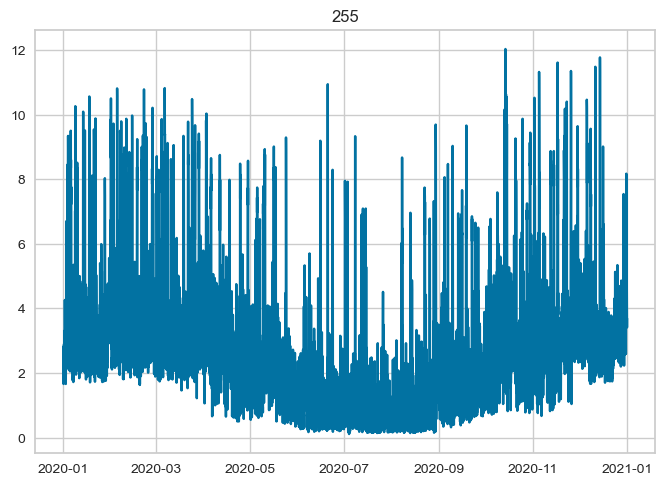

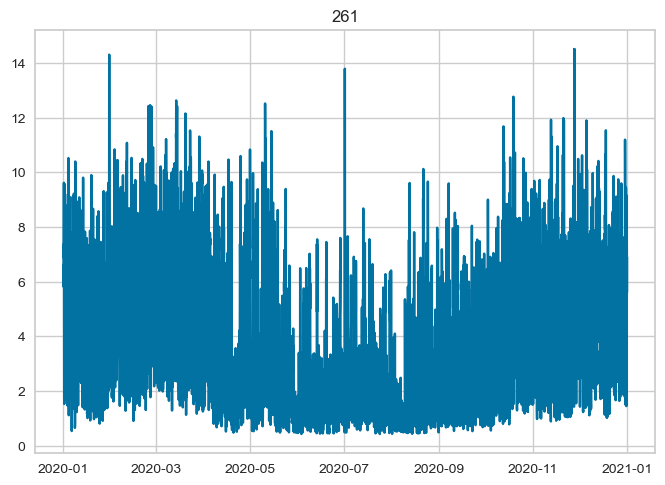

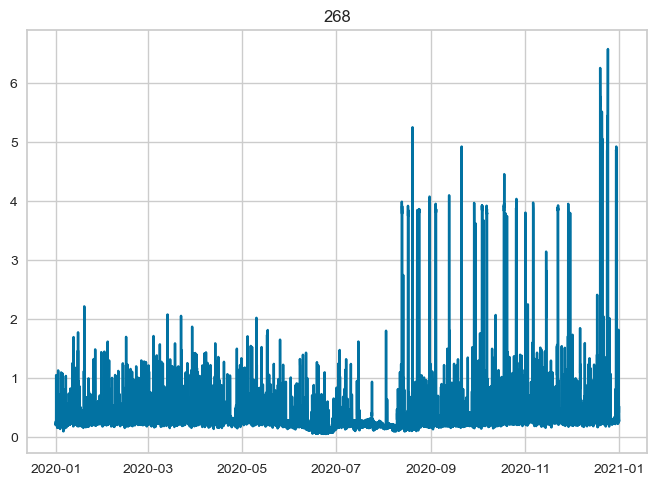

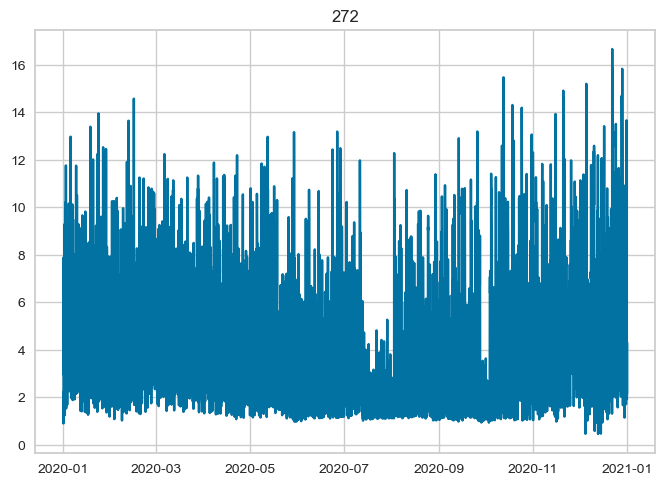

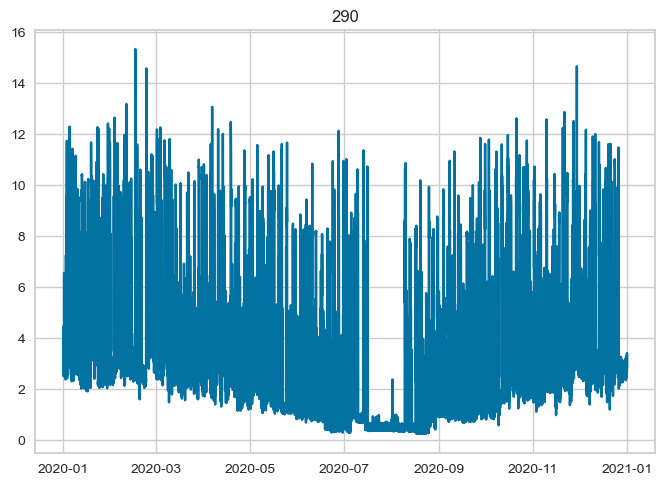

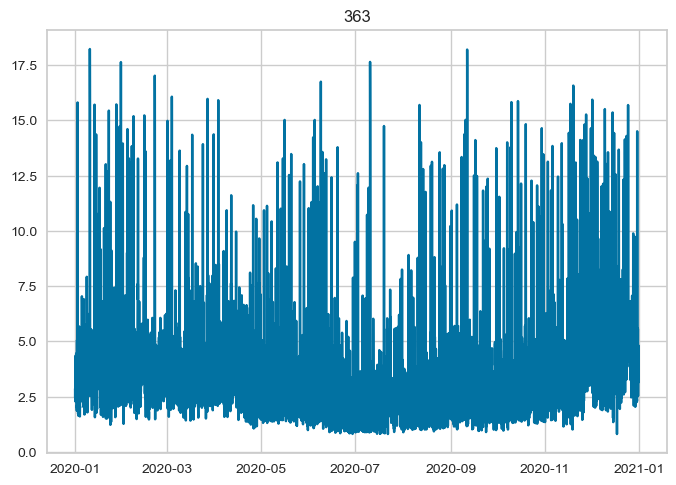

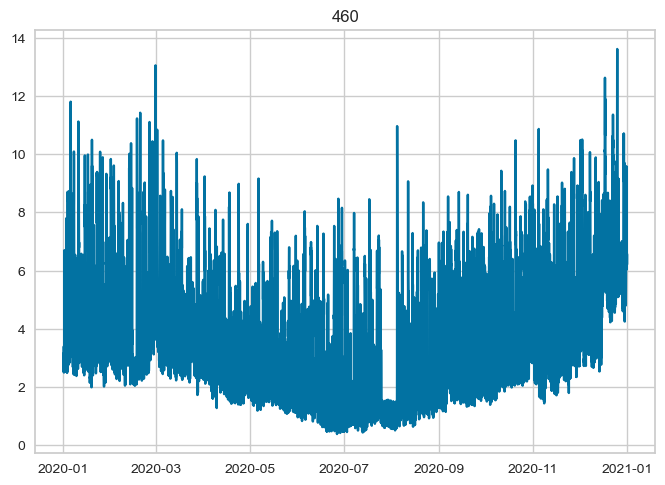

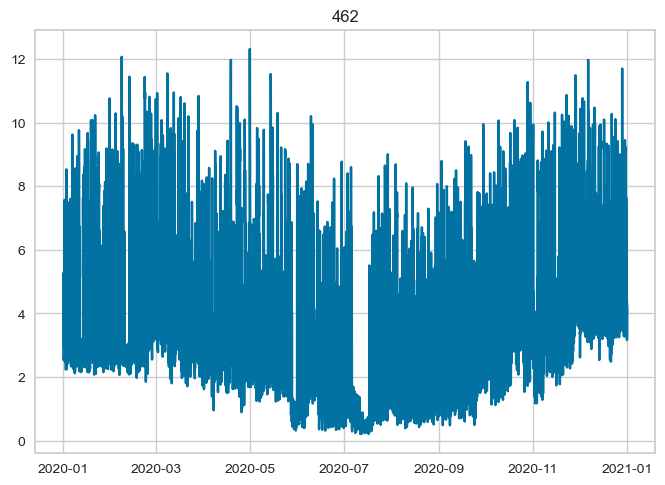

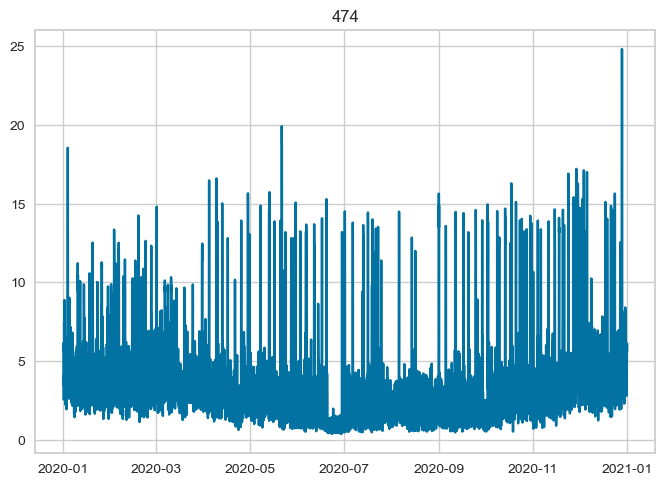

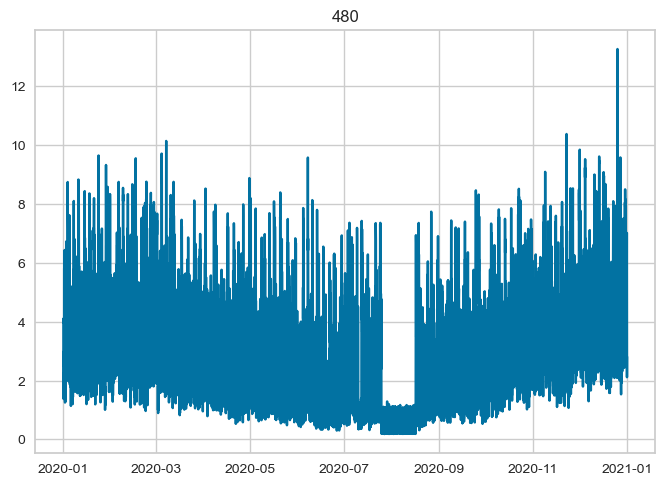

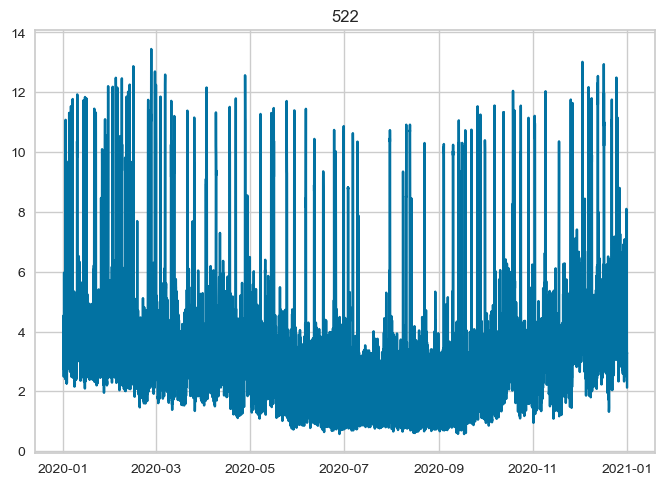

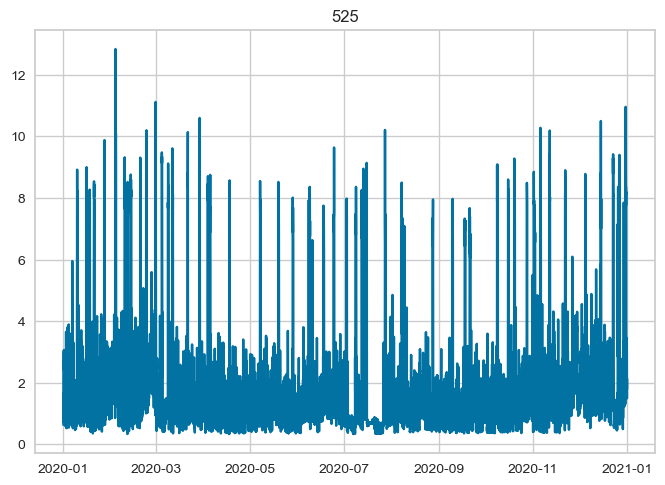

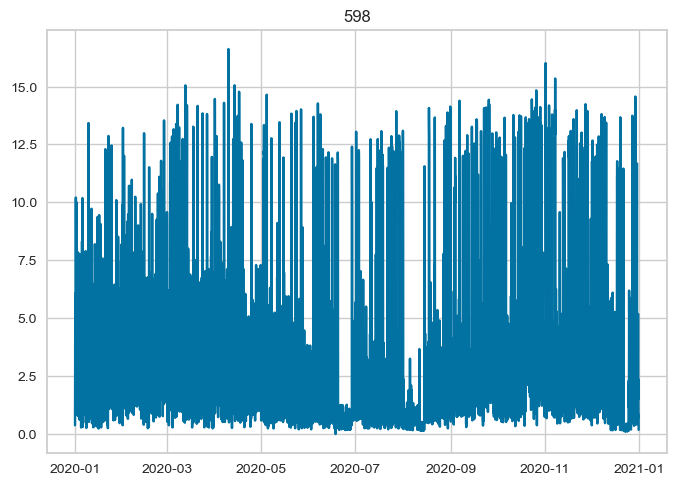

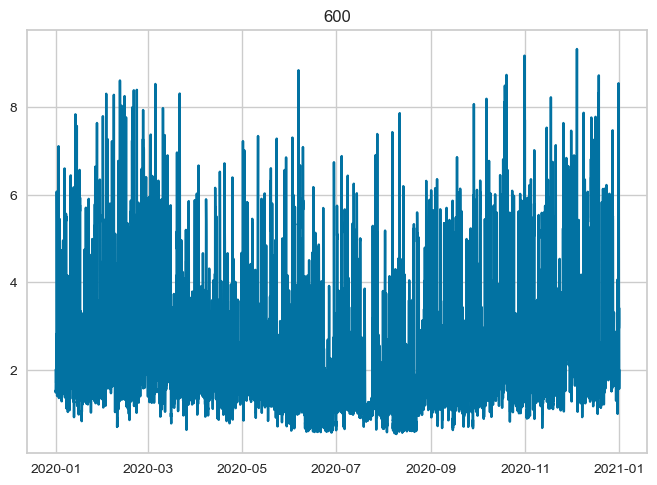

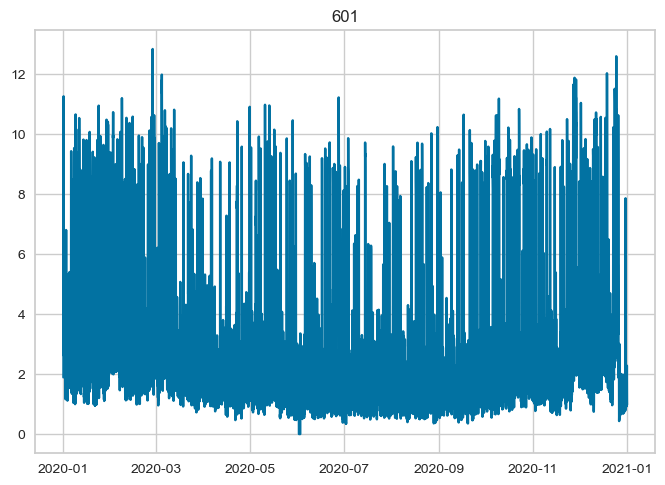

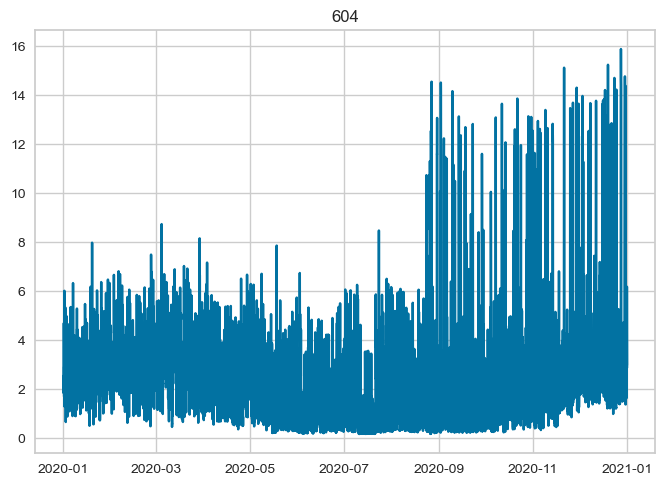

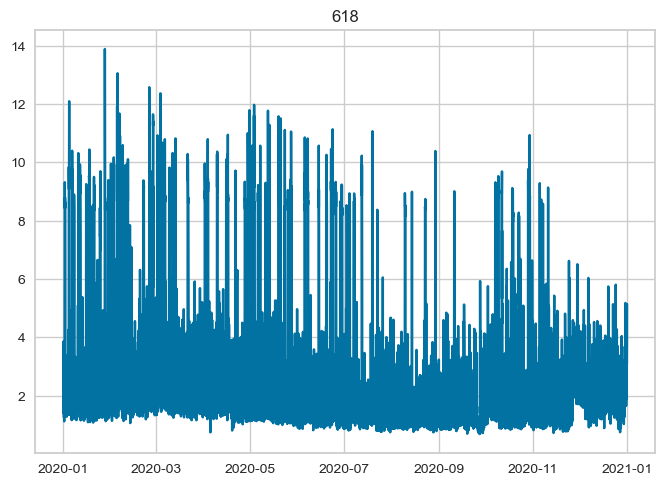

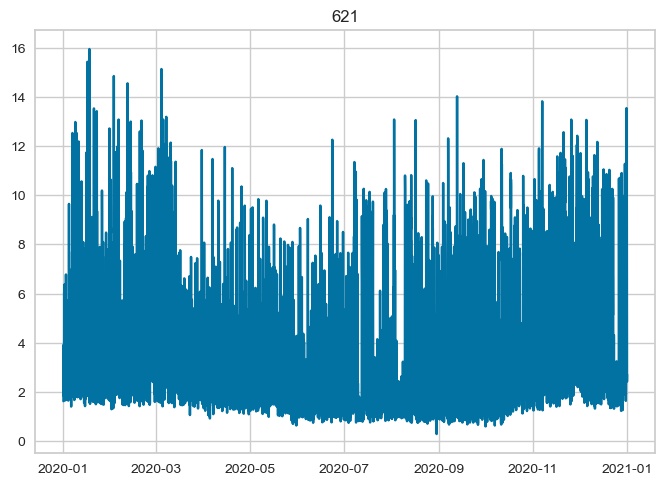

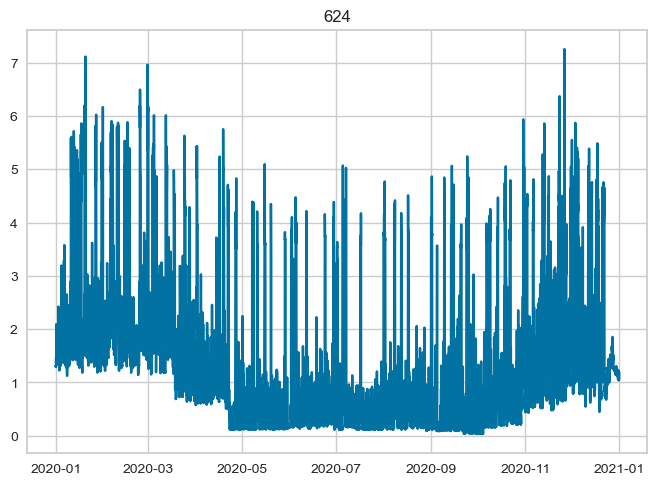

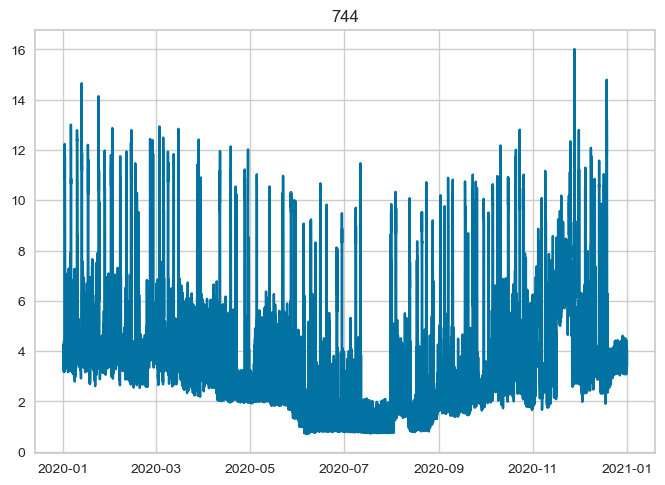

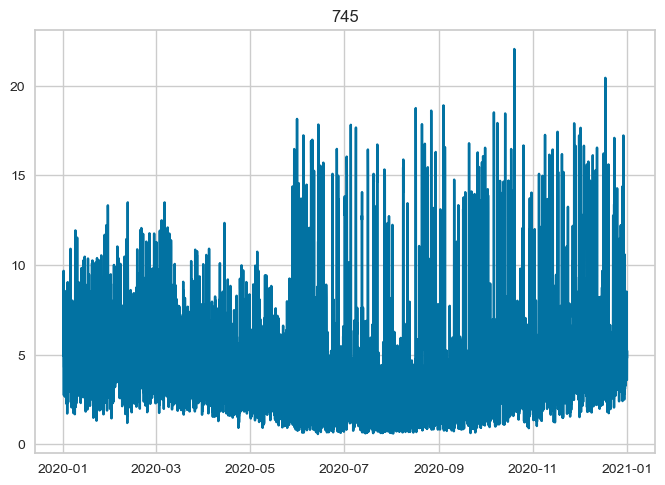

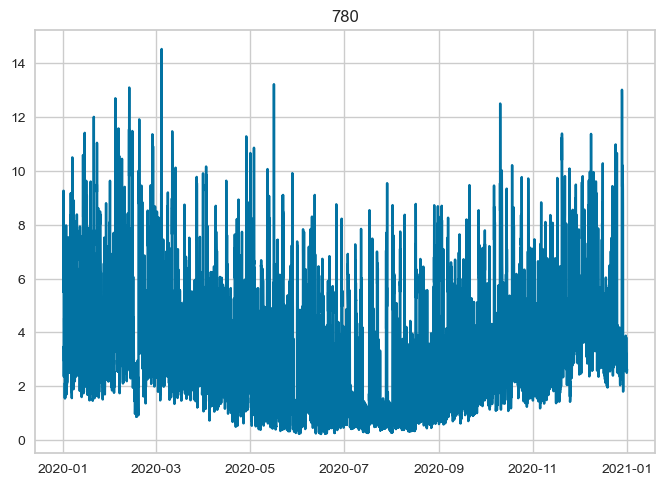

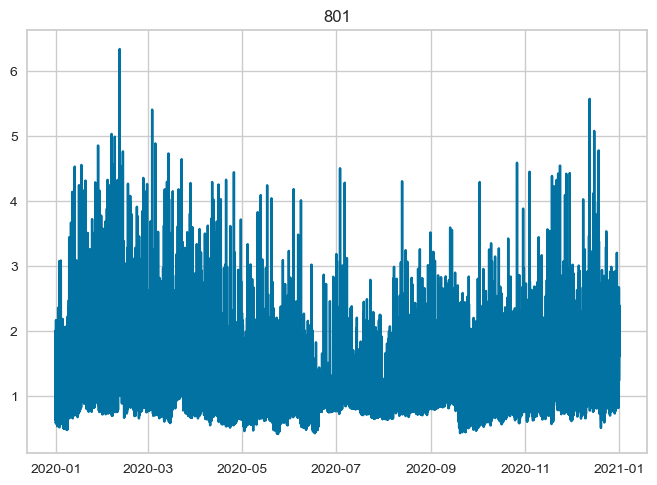

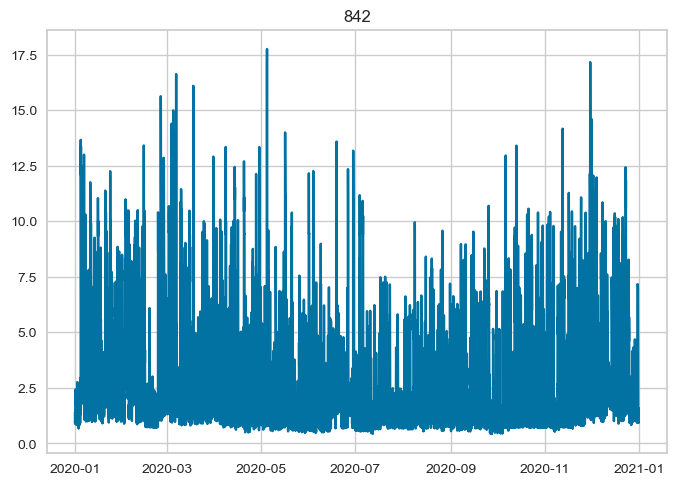

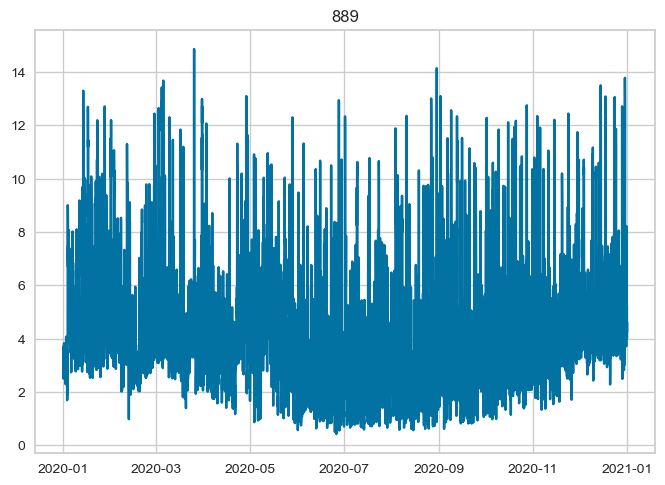

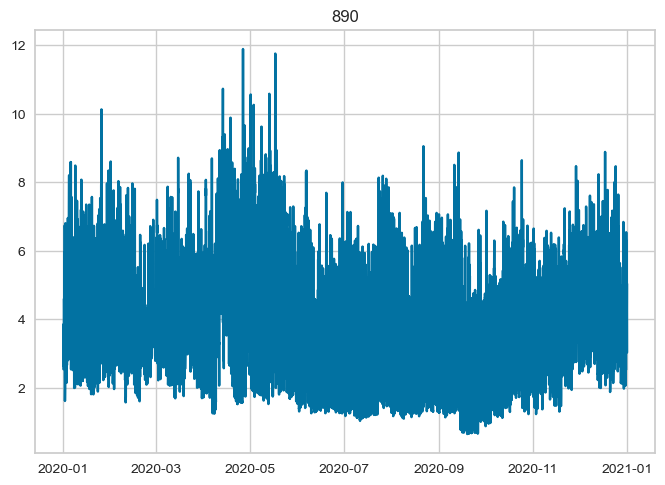

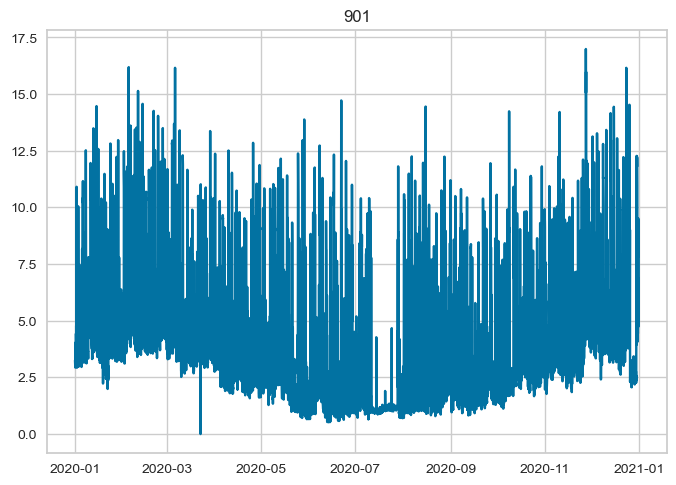

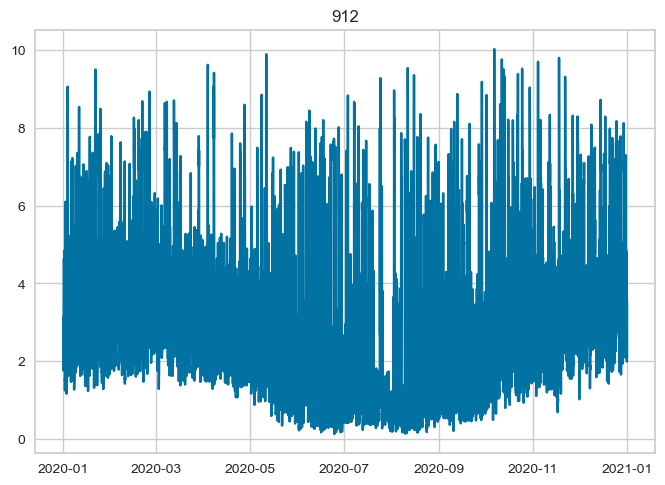

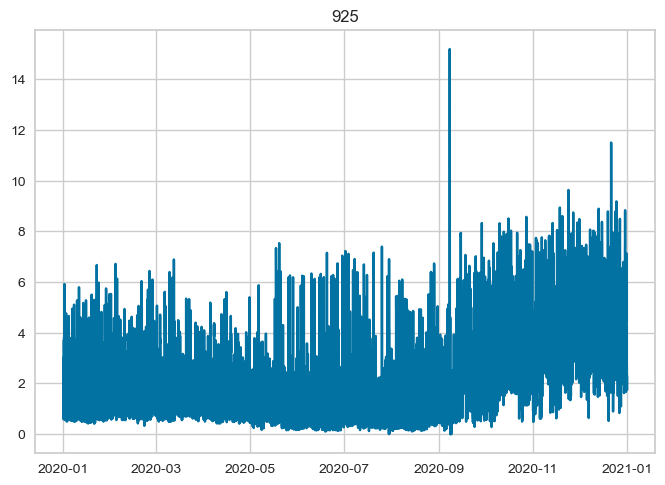

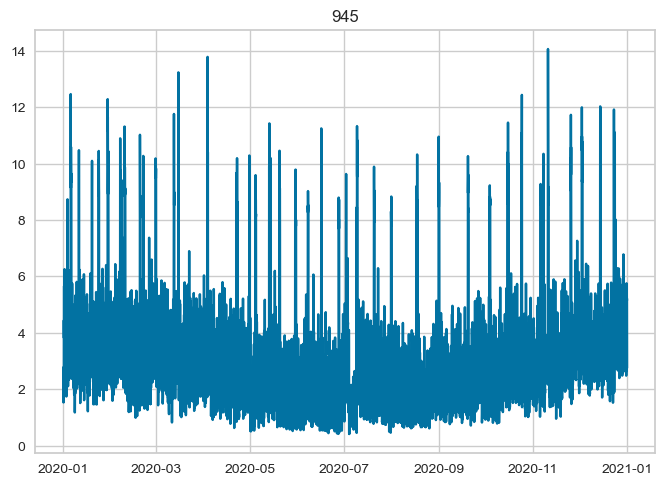

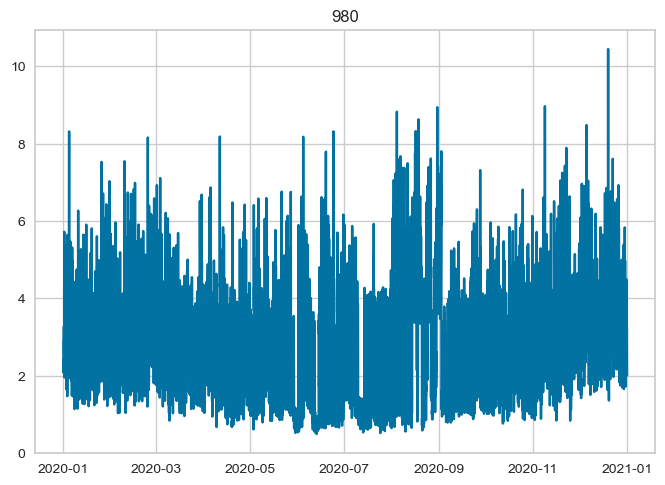

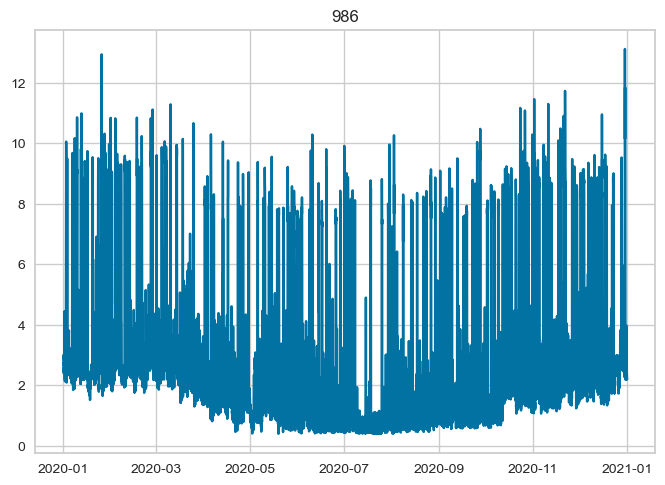

In [146]:
for h_i in df_clusters[df_clusters["clusters"] == 2].home_num:
    plt.plot(data[h_i]["consumption"])
    plt.title(h_i)
    plt.show()

In [157]:
df_clusters.to_csv("../../data/cluster_idx.csv", index=False)

## TS Clustering

In [13]:
from tslearn.clustering import TimeSeriesKMeans

In [66]:
data_unpack_daily = {}
for home_num in homes_indexes:
    temp_df = data[home_num].copy()
    temp_df = temp_df.reset_index().drop_duplicates(subset='time', keep="last").set_index("time")
    temp_df["date"] = temp_df.reset_index()["time"].dt.date.values
    daily_cons = temp_df.iloc[:-1].groupby("date")["consumption"].sum()
    min_ = daily_cons.min()
    max_ = daily_cons.max()
    data_unpack_daily[home_num] = (daily_cons - min_)/(max_ - min_)
del temp_df

In [74]:
data_clusters_ts = pd.DataFrame(data_unpack_daily).T

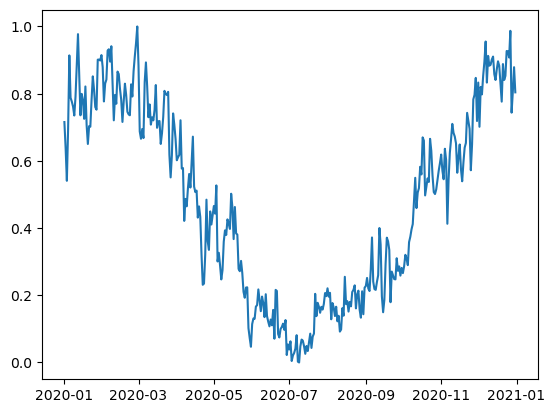

In [75]:
plt.plot(data_unpack_daily["657"])

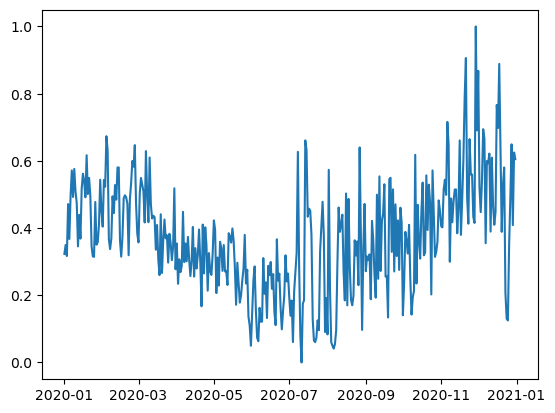

In [76]:
plt.plot(data_unpack_daily["621"])

In [77]:
data_clusters_ts

date                      2020-01-01                      2020-01-02  \
854   0.7005213297638682834243657431  0.6145226393044516091601534980   
123   0.7233626669771929532713389783  0.4058356761432635203699698900   
852   0.6797879557610084723032989918  0.6478708802044712304561159932   
222   0.5168079800498753117206982544  0.5289775561097256857855361596   
484   0.6885084903269409478753062431  0.6701339021711582326603024415   
..                               ...                             ...   
890   0.4652523068607389676074282846  0.4272711478321300335894367013   
412   0.7337577868090848125914015852  0.7124758619017993487763297163   
261   0.7143171520305155709537808725  0.7423386618967278144237985340   
957   0.6141433831492311024474767165  0.5727745289148797920727745289   
600   0.4568382508624877009876573962  0.5467611562939806454023489557   

date                      2020-01-03                      2020-01-04  \
854   0.7171392340016410698449271879  0.6114725700977182498570280059   
123   0.5244456274017267479580124100  0.7012127160514364613311596493   
852   0.6373002224571257277187889497  0.7415474180774024580723537857   
222   0.4302244389027431421446384040  0.5762593516209476309226932668   
484   0.8613246599645180366646954465  0.8179331756357185097575399172   
..                               ...                             ...   
890   0.4540944365082429249835913671  0.6498204702521138179993050461   
412   0.5846631169859494049302318065  0.6650965119943118925076959125   
261   0.6599274352362304693010422015  0.6876216701181011279701615497   
957   0.3930041152263374485596707819  0.2983539094650205761316872428   
600   0.3159009104382807537582045310  0.3759450000622734802157153355   

date                      2020-01-05                      2020-01-06  \
854   0.5348893106677828151807248887  0.5172188010244254183484869833   
123   0.6549082561176451017250844243  0.6065077437492722040157702993   
852   0.8900257166748181689096445419  0.7556048151712604326081125854   
222   0.6645386533665835411471321696  0.5696758104738154613466334165   
484   0.7297562727042324913407113289  0.8382085832558925403396130776   
..                               ...                             ...   
890   0.7928072275201729662947376549  0.5309737075788579591521562874   
412   0.7406982475134728966525810596  0.6319535902138696098313766998   
261   0.6952562055286901665152549641  0.5014755587656090418178432579   
957   0.5481914663201212908815247997  0.7778860732077106346112194065   
600   0.4868042495422899204144922843  0.5562267252867693763933691198   

date                      2020-01-07                      2020-01-08  \
854   0.6166692912733210114957771460  0.5935036841189195461364408676   
123   0.4834561575699100028280072530  0.5519272037662402475338113220   
852   0.7014341384913935913415269078  0.6649180379597052837511635612   
222   0.6331172069825436408977556110  0.6566583541147132169576059850   
484   0.8533306581059390048154093098  0.7657345611219058883162963589   
..                               ...                             ...   
890   0.4801745106366549554071271379  0.5384155051928496969228987298   
412   0.5573941357550881899052251408  0.5581536273804810652274031042   
261   0.7040757020894814948567043409  0.5232675585850435332155895746   
957   0.6352609919861381849685943253  0.6205328135152696556205328135   
600   0.4156381163517704350425327870  0.2920128034275323510729720641   

date                      2020-01-09                      2020-01-10  ...  \
854   0.7308976983581013319188084838  0.7442583276006398514748908025  ...   
123   0.4697486400612180393592068271  0.4720526342055794919568146657  ...   
852   0.7586182414843096729406938769  0.8195415174415852831200795166  ...   
222   0.6371072319201995012468827930  0.6578553615960099750623441397  ...   
484   0.7043486525302019092675508997  0.7142645940694432710990960547  ...   
..                               ...                             ...  ...   
8

In [107]:
clusters = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
intertina = []
for c in clusters:
    km = TimeSeriesKMeans(n_clusters=c, metric="euclidean", max_iter=10,random_state=0).fit(data_clusters_ts)
    intertina.append(km.inertia_)

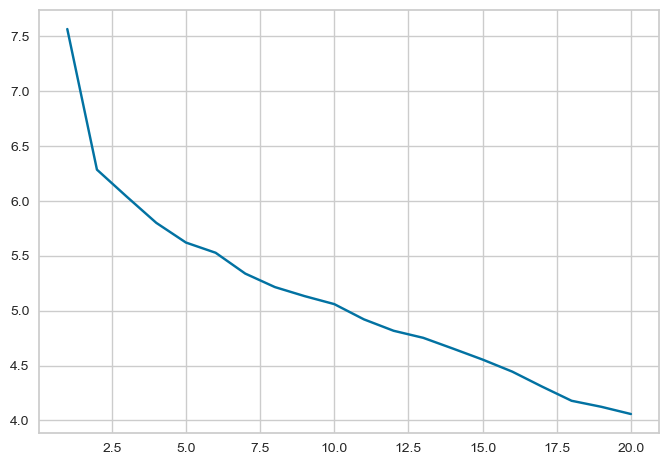

In [108]:
plt.plot(clusters,intertina)

In [126]:
km = TimeSeriesKMeans(n_clusters=2, metric="euclidean", max_iter=10,random_state=0).fit(data_clusters_ts)
clusters = km.labels_

/Users/efim/opt/anaconda3/envs/EnergyForecasting/lib/python3.10/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 7 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
/Users/efim/opt/anaconda3/envs/EnergyForecasting/lib/python3.10/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 100 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


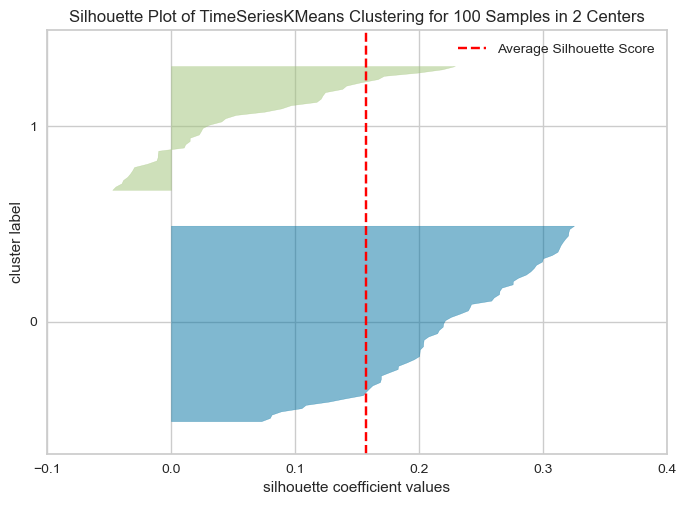

<AxesSubplot:title={'center':'Silhouette Plot of TimeSeriesKMeans Clustering for 100 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [127]:
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')

visualizer.fit(data_clusters_ts)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [130]:
df_ts_clusters_index = pd.DataFrame({ "clusters": clusters, "home_num": data_clusters_ts.index})

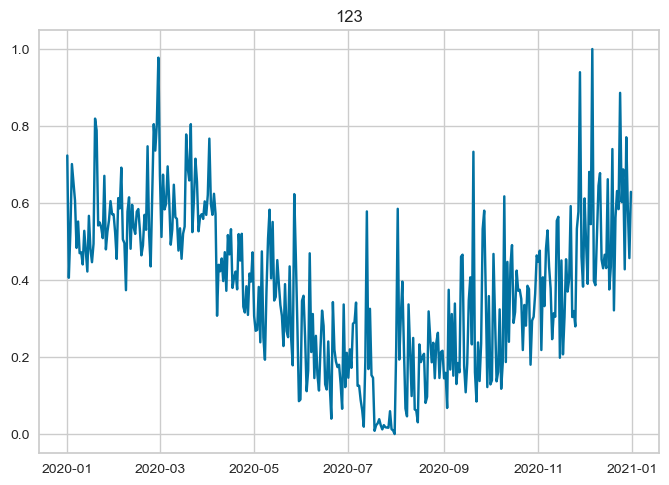

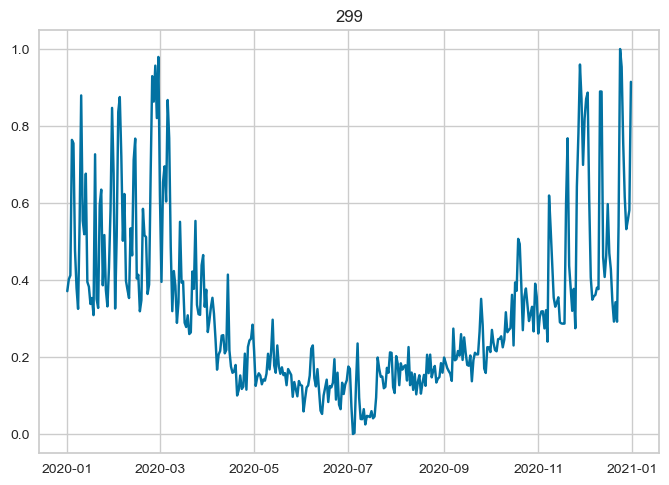

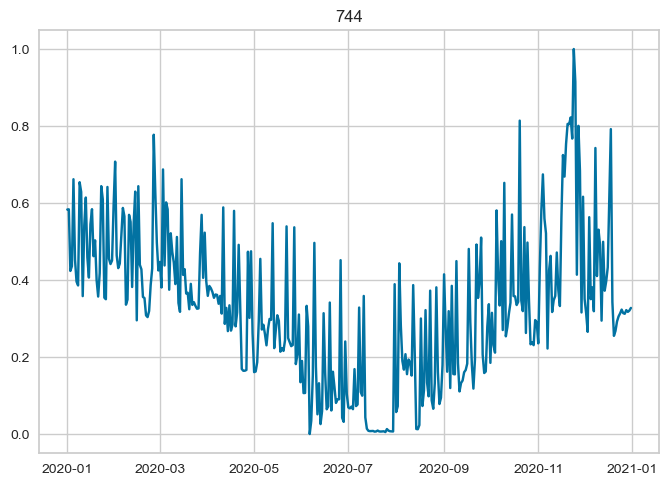

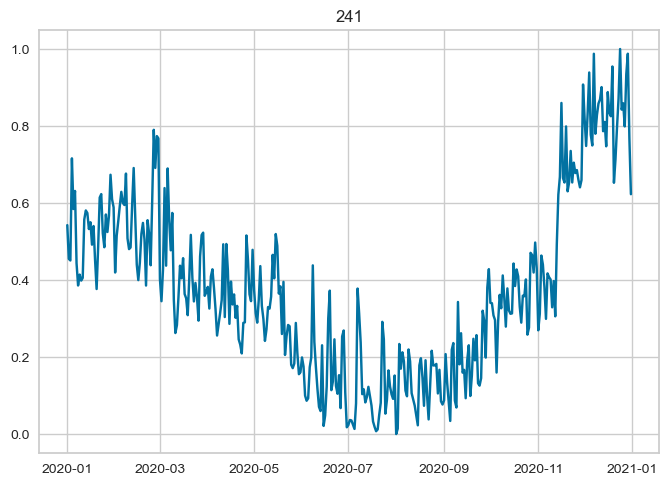

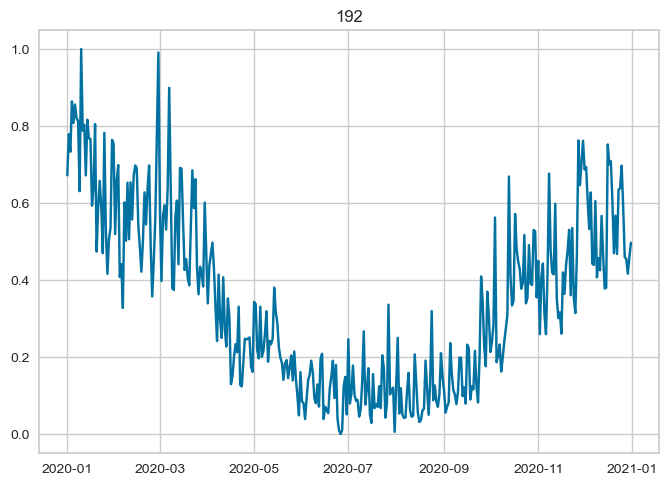

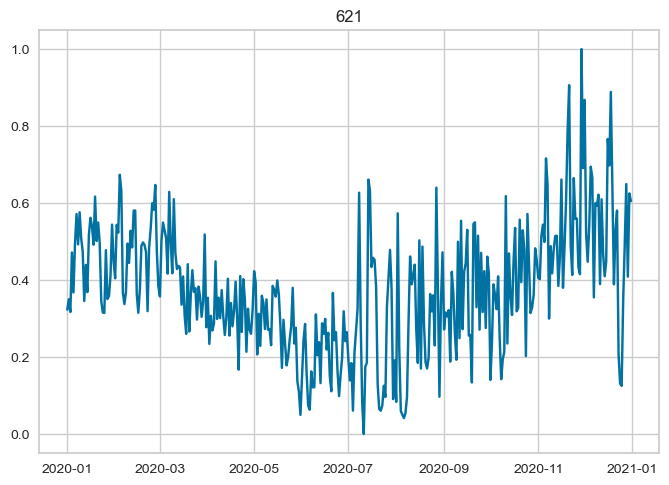

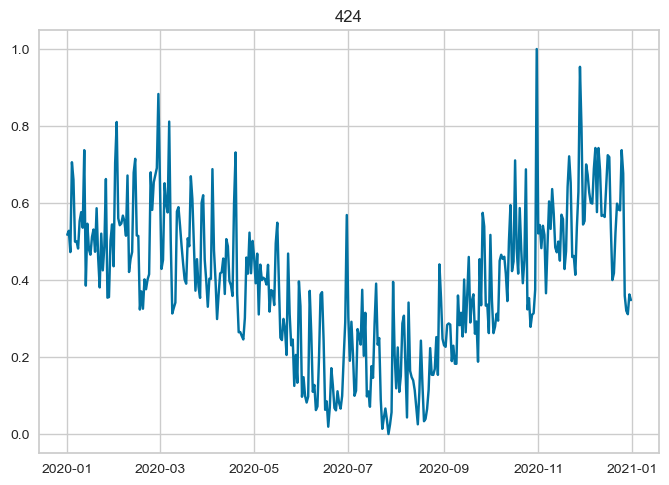

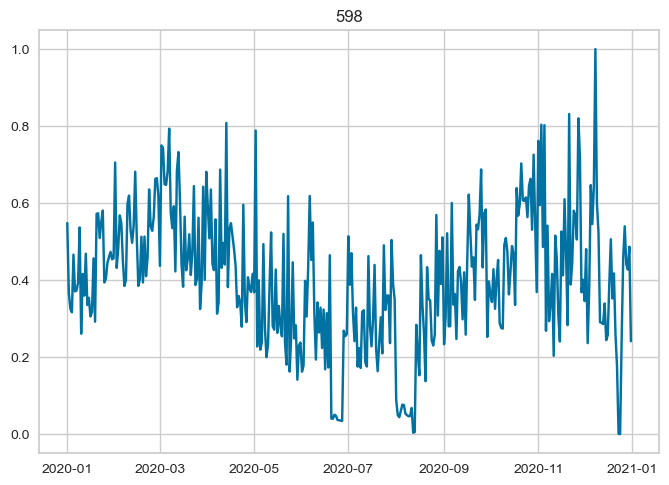

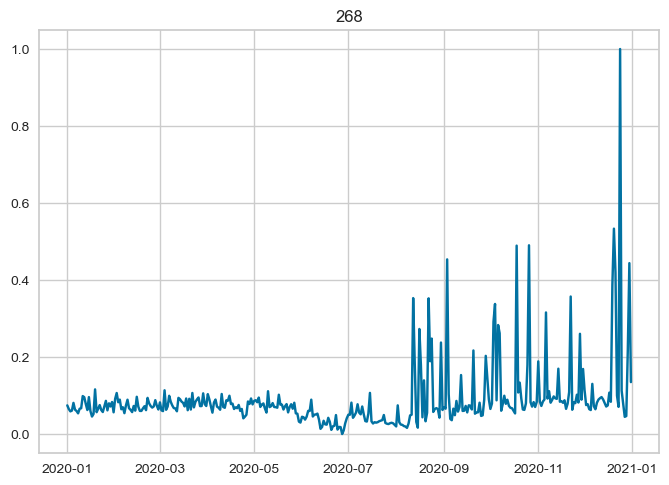

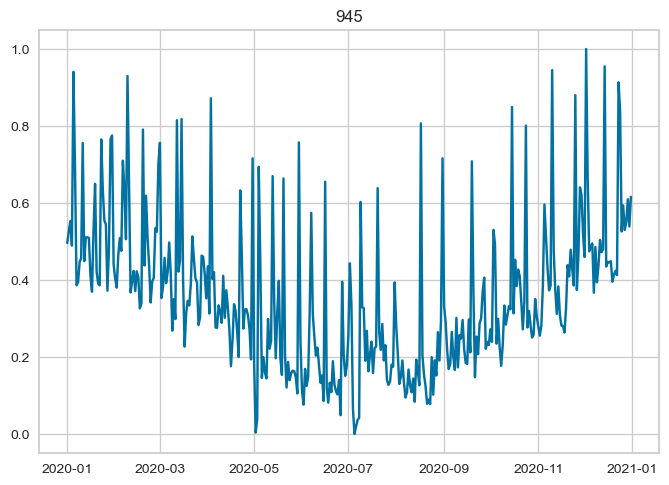

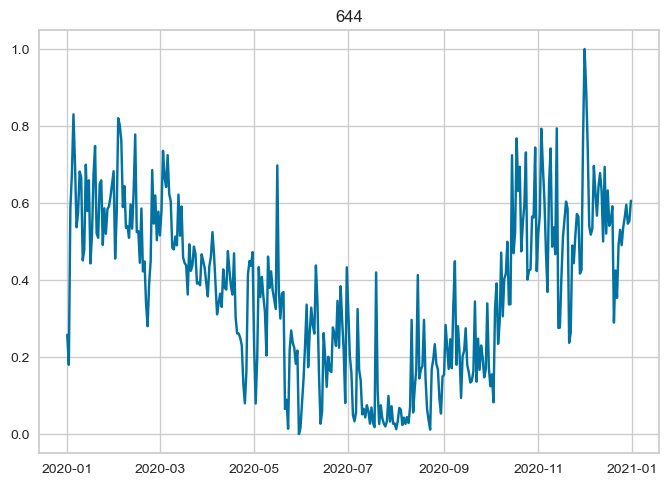

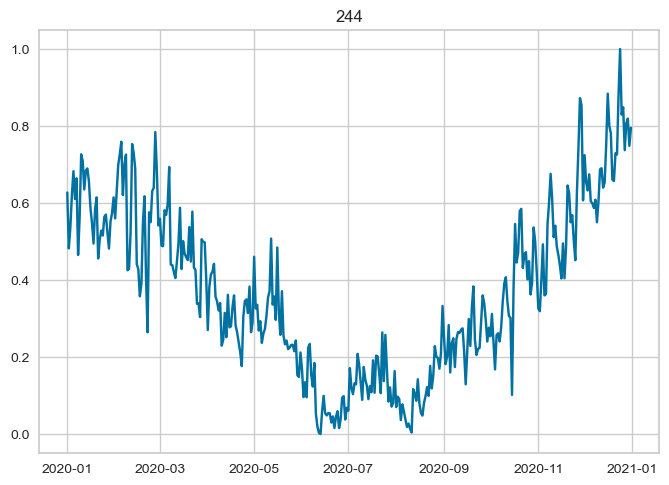

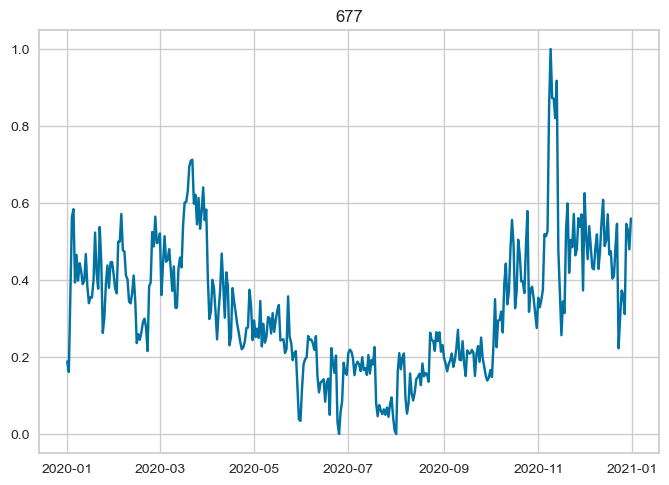

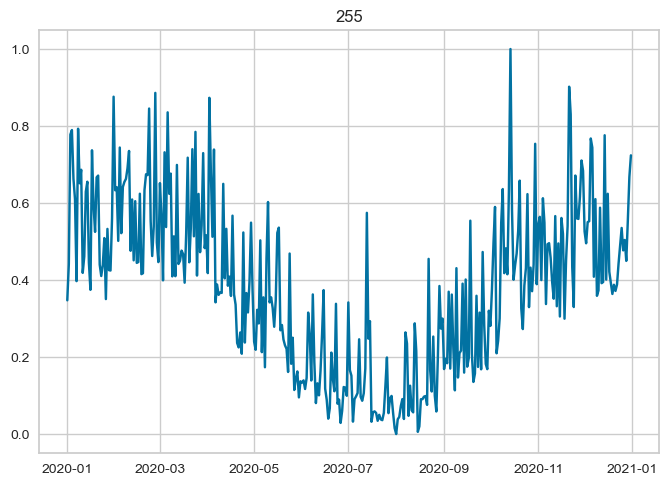

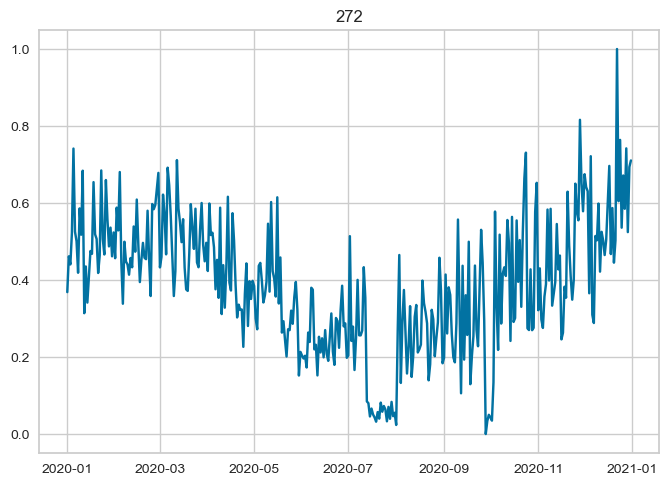

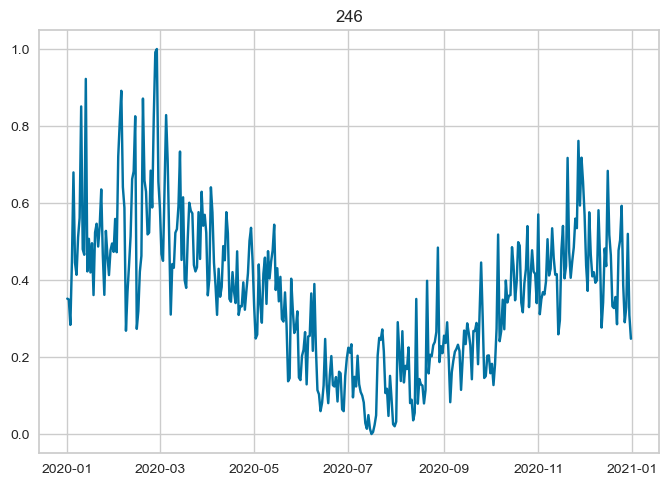

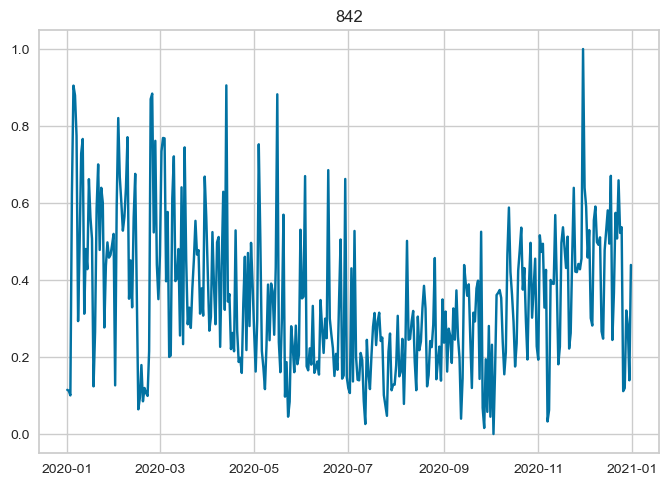

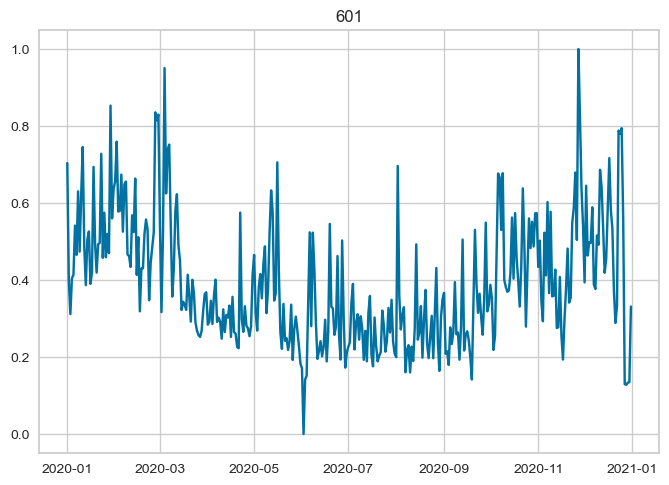

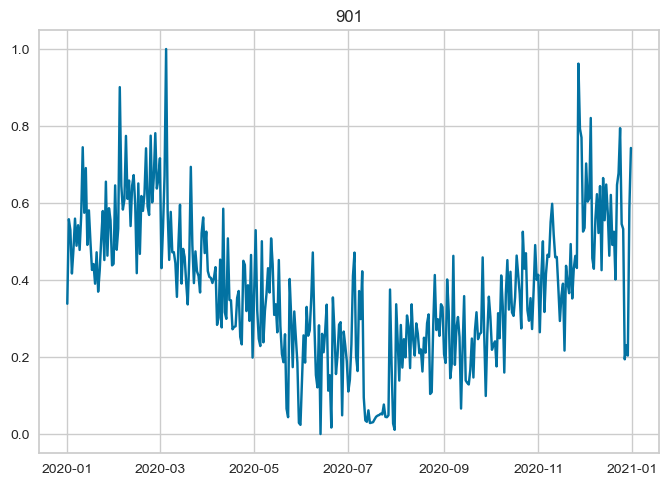

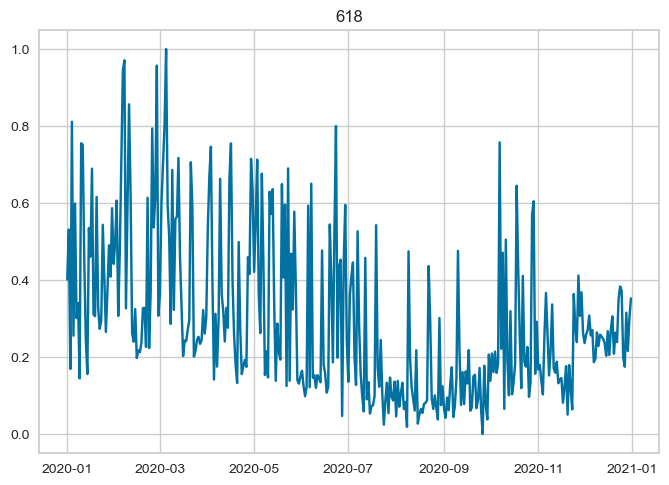

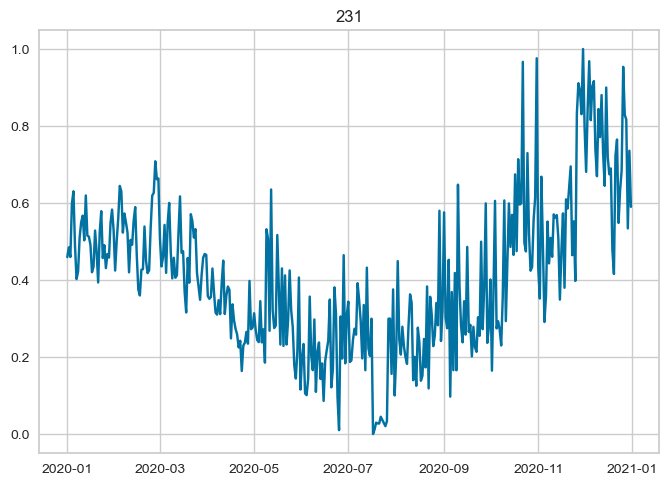

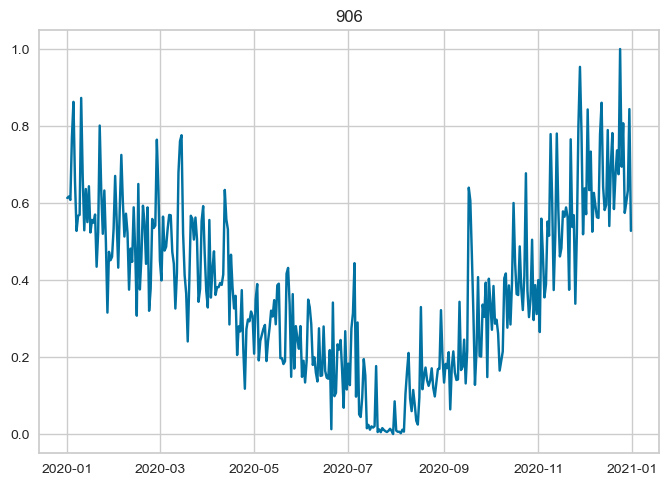

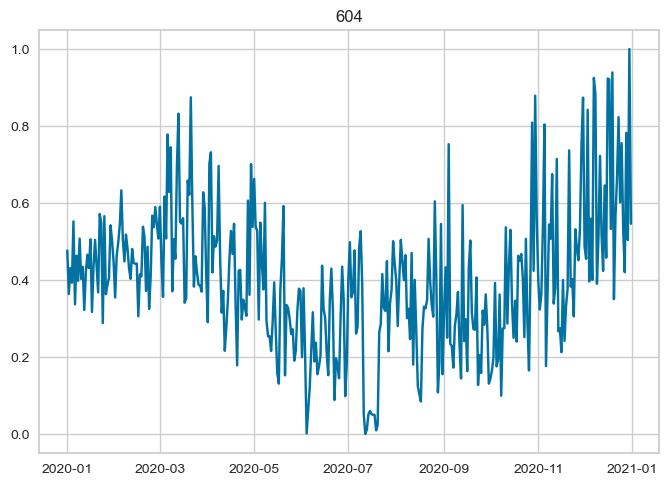

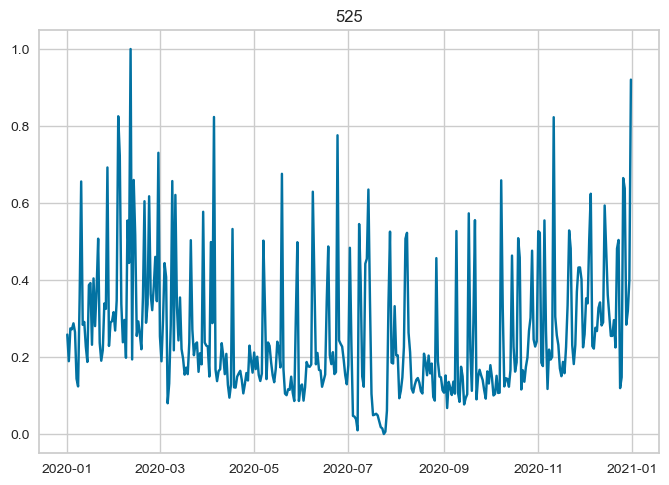

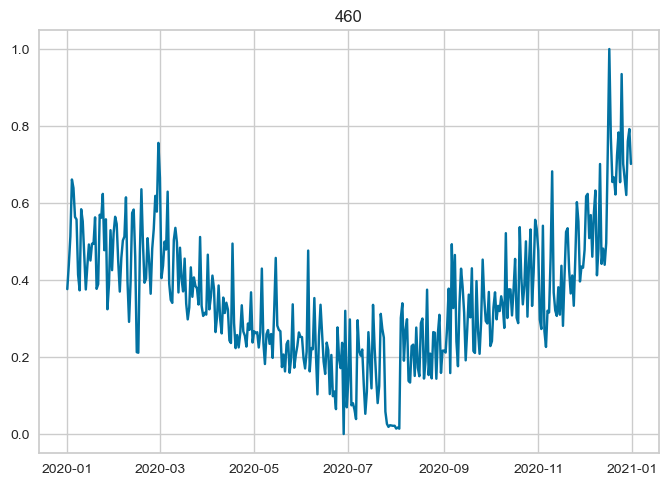

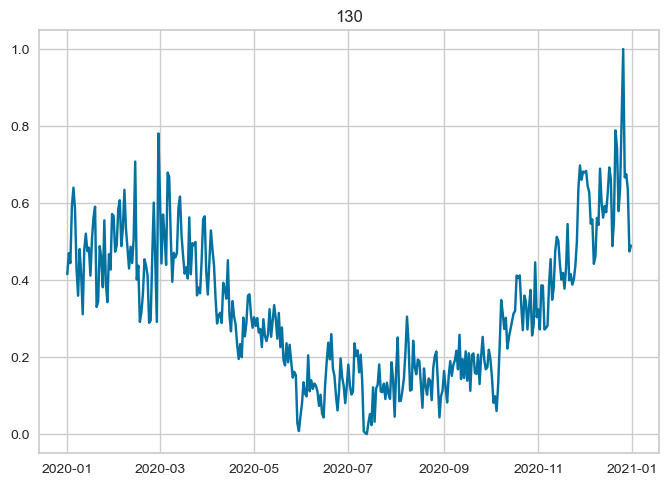

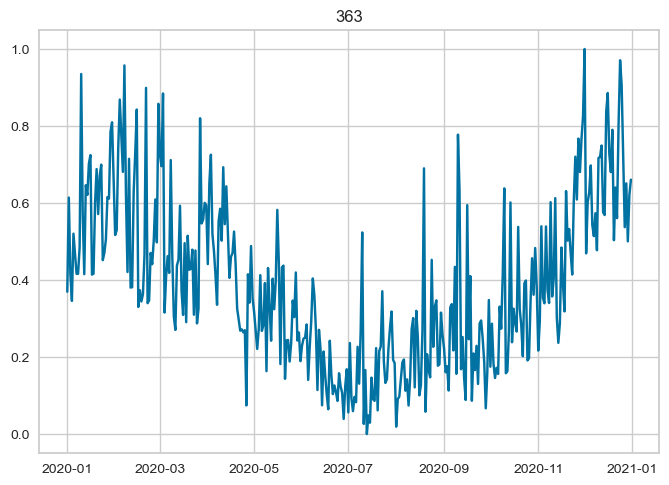

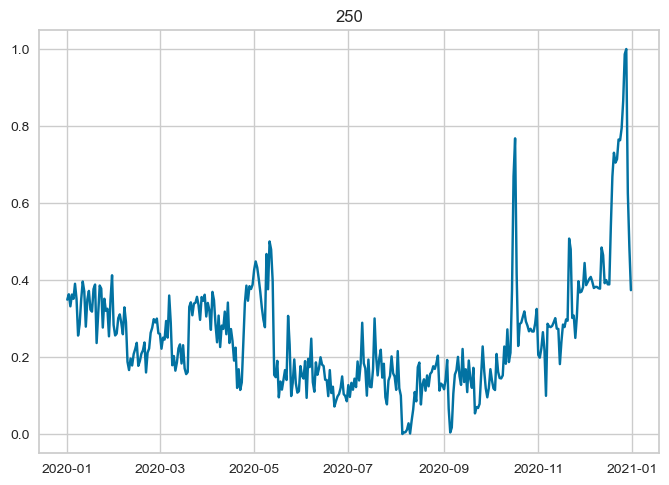

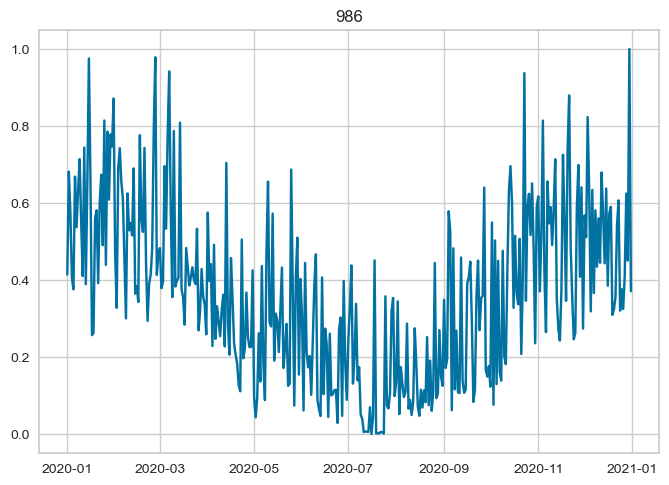

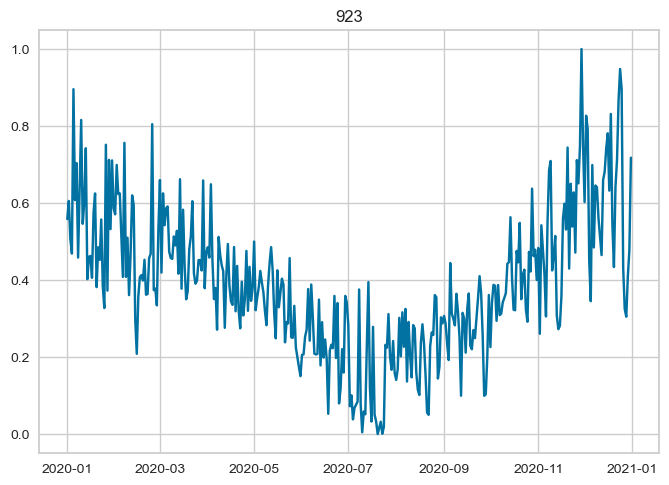

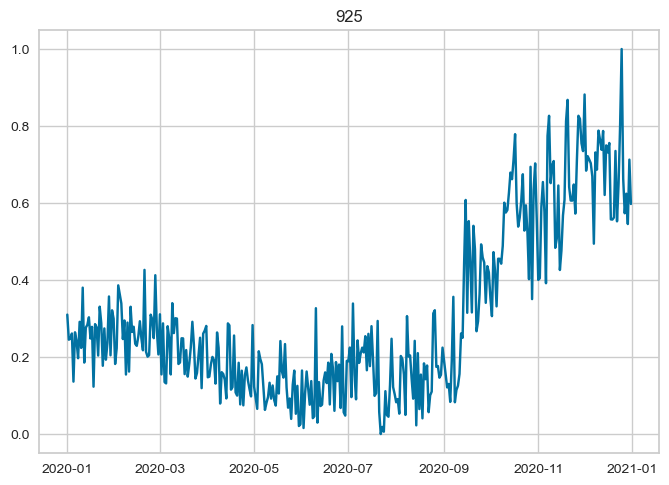

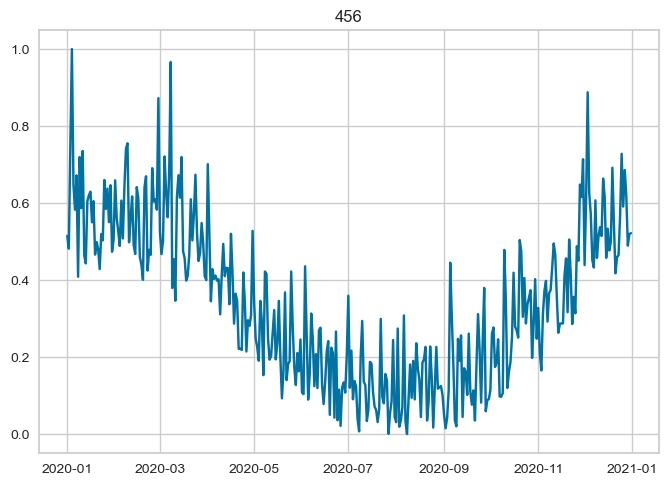

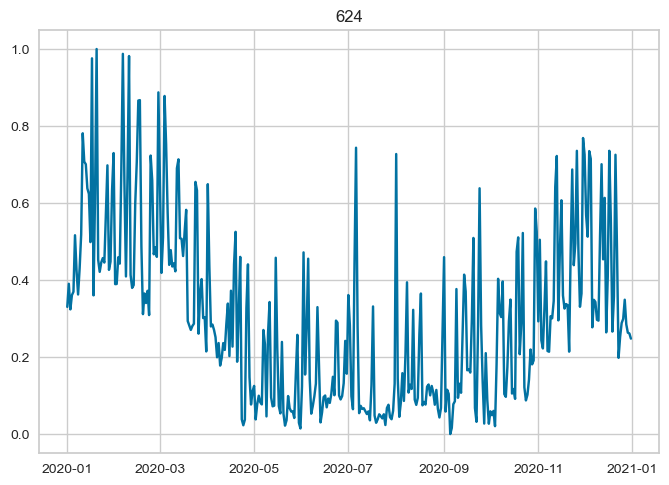

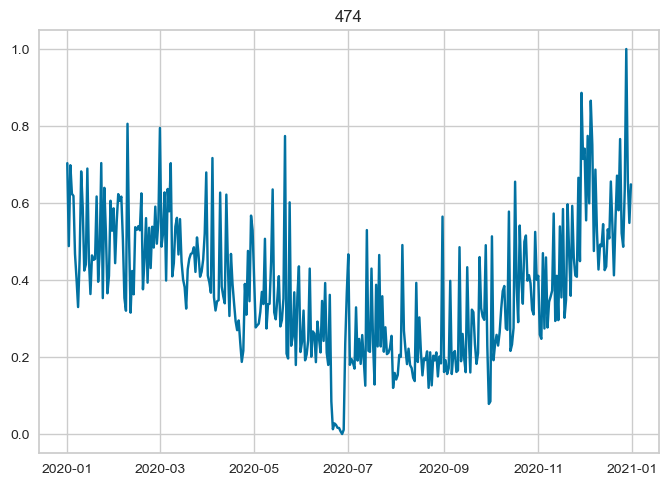

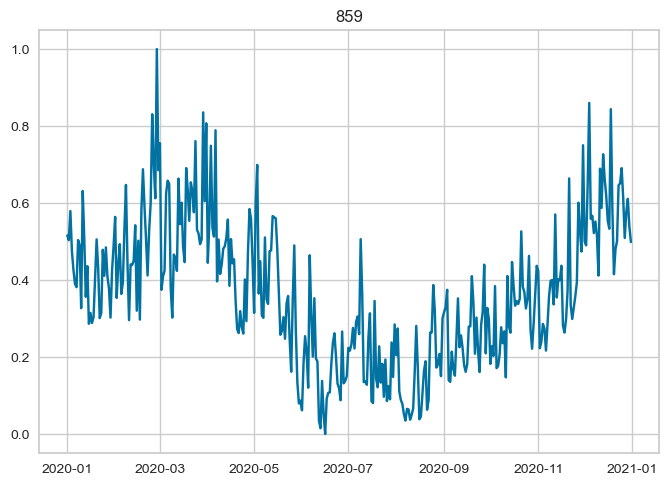

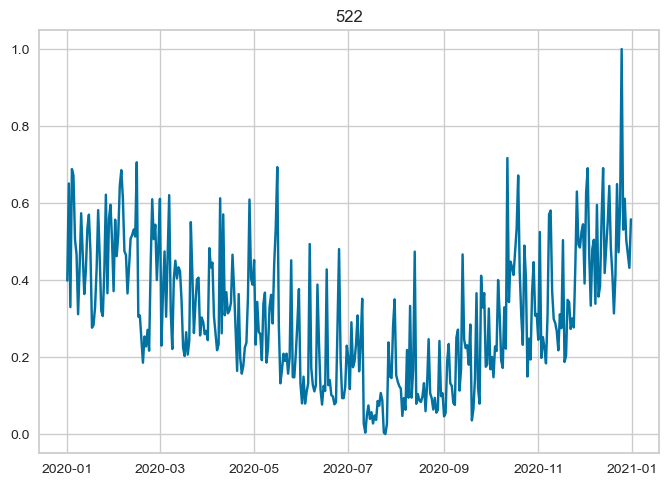

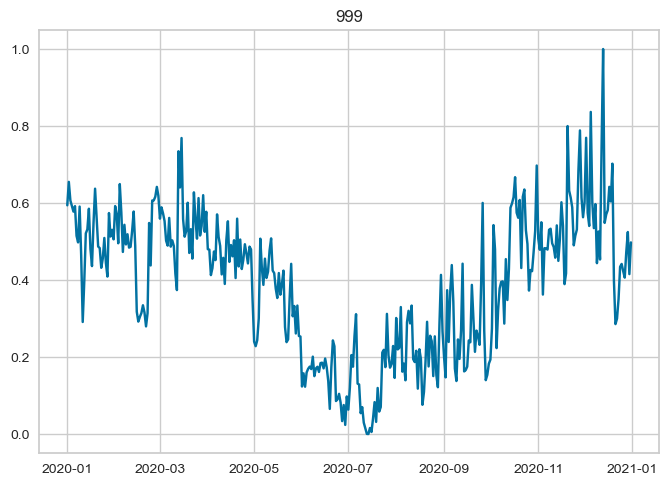

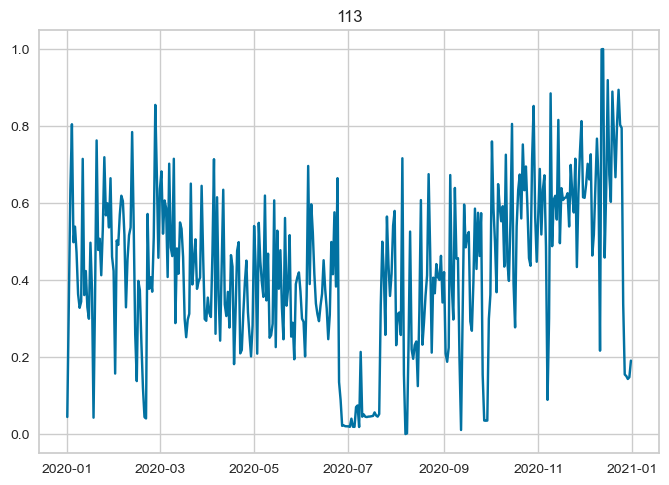

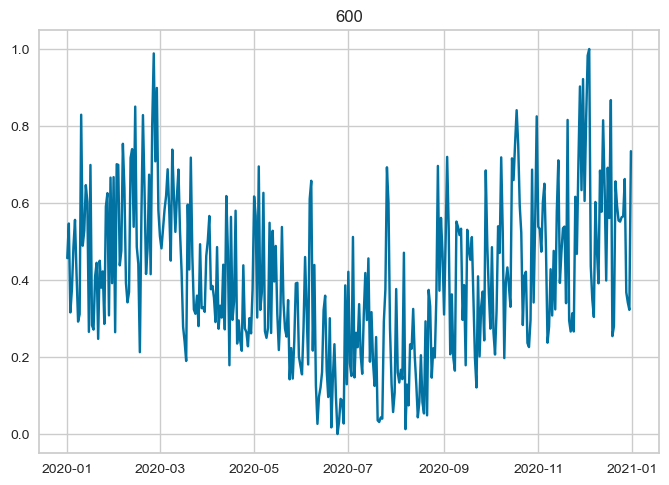

In [140]:
for h_i in df_ts_clusters_index[df_ts_clusters_index["clusters"] == 1].home_num:
    plt.plot(data_clusters_ts[data_clusters_ts.index == h_i].T)
    plt.title(h_i)
    plt.show()

In [141]:
df_ts_clusters_index.to_csv("../../data/cluster_idx.csv", index=False)

# Temp Diff

In [218]:
x = data["123"].copy()
x["temp_dif"] = data["123"].temperature - data["123"].temperature.shift(-24) 

In [219]:
x["pos_neg_temp_diff"] = x["temp_dif"].apply(lambda x: 0 if x>=0 else 1)
x["consumption"]=x["consumption"].astype('float')

In [220]:
x=x.dropna()

<AxesSubplot:xlabel='pos_neg_temp_diff', ylabel='consumption'>

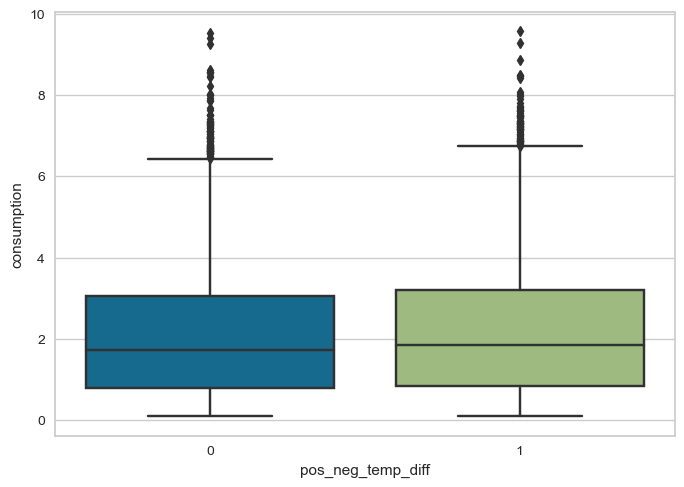

In [221]:
sns.boxplot(data=x[["pos_neg_temp_diff", "consumption"]], x="pos_neg_temp_diff", y = "consumption")